<a href="https://colab.research.google.com/github/crislanecas/estudos_r/blob/main/Google%20Data%20Analytics/An%C3%A1lise_de_dados_com_R_Bellabeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Caso: Análise de Dados Bellabeat

Esta é uma análise de dados desenvolvida durante o último módulo da Certificação Google Data Analytics na plataforma Coursera.   

Para esta análise, segui o processo de análise de dados em seis etapas ensinadas no decorrer do programa (perguntar, preparar, analisar, compartilhar e agir), utilizando a linguagem de programação R.

## Introdução
Neste estudo de caso, atuo como uma analista de dados júnior na equipe de marketing da Bellabeat (https://bellabeat.com/), uma fabricante de produtos de alta tecnologia voltados para a saúde das mulheres. Meu objetivo é analisar dados de dispositivos inteligentes para obter insights que possam orientar a estratégia de marketing da empresa.


## Cenário
Fundada em 2013, a Bellabeat é conhecida por seus produtos inteligentes de bem-estar para mulheres. Uma empresa em crescimento com potencial para expandir sua participação no mercado global de dispositivos inteligentes. A CEO, Urška Sršen, acredita que a análise de dados de condicionamento físico pode abrir novas oportunidades de crescimento. Fui solicitado a analisar dados de uso de dispositivos inteligentes e aplicar esses insights em um dos produtos da Bellabeat.

# PERGUNTAR

## Tarefa de negócios
Entender como usuários de dispositivos inteligentes usam seus dispositivos para monitorar e melhorar sua saúde e bem-estar, para identificar tendências que podem ser aplicadas aos clientes da Bellabeat e orientar as estratégias de marketing da empresa.


# PREPARAR



## Preparando ambiente

In [ ]:
# Importa e carrega o pacote básico para trabalhar com dados.
install.packages("tidyverse")
library(tidyverse)

# Importa e carrega o pacote necessário para limpeza dos dados.
install.packages("janitor")
library(janitor)

# Importa e carrega o pacote necessário para resumo dos dados.
install.packages("skimr")
library(skimr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importanto conjunto de dados

Conforme orientação para este estudo de caso, utilizarei os dados do Fitbit Fitness Tracker, disponibilizado no Kaggle pelo usuário Möbius e armazenado no link: https://www.kaggle.com/datasets/arashnic/fitbit/data. Eles estão sob licença de domínio público CC0*. Segundo informações na página, os dados foram gerados por participantes de uma pesquisa distribuída via Amazon Mechanical Turk entre 12/03/2016 e 12/05/2016. Contêm informações de 30 usuários do Fitbit que consentiram com o envio de dados pessoais do rastreador, incluindo resultados de atividade física, frequência cardíaca e monitoramento do sono.

Os dados foram baixados em um arquivo zip com duas pastas, com registros de 12/03 a 11/04/2016 e outra de 12/04 a 12/05/2016, contendo 11 e 18 arquivos CSV, respectivamente. Estão armazenados em um formato longo, onde há vários registros de usuários (a variação entre a saída representa o uso de diferentes tipos de rastreadores Fitbit e comportamentos/preferências de rastreamento individuais). A estrutura desses arquivos é complementar e, em alguns casos, há replicação de conteúdo com registros mais detalhados de horas e minutos em outros arquivos.

Para este estudo, selecionei apenas os arquivos de dados listados abaixo com registros mais amplos de atividade física, frequência cardíaca, monitoramento do sono e informações de peso:
* dailyActivity_merged
* heartrate_seconds_merged
* sleepDay_merged
* weightLogInfo_merged

Apesar da linguagem de programação ser a mais eficiente para grandes volumes de dados, ainda sim temos um limitação de processamento.

*CC0 (Creative Commons Zero), a sigla é usada para indicar que o criador renunciou a todos os seus direitos autorais e direitos conexos sobre a obra, permitindo que seja usada por qualquer pessoa de qualquer forma, sem restrições.




**Disclaimer**: Os dados utilizados neste estudo são de domínio público e foram disponibilizados por usuários do Fitbit Fitness Tracker. Não há garantias quanto à precisão ou integridade dos dados. Este estudo é puramente acadêmico e não tem como objetivo fazer afirmações definitivas sobre os produtos ou serviços do Fitbit. Qualquer análise ou conclusão apresentada é baseada nos dados disponíveis no momento da análise.

Adicionalmente, é importante ressaltar que o conjunto de dados contém informações de apenas 30 usuários do Fitbit, o que pode não representar com precisão a diversidade de usuários do Fitbit e pode levar a conclusões tendenciosas. Embora o público-alvo da análise sejam mulheres, não há indicação de que os dados tenham sido recolhidos especificamente de mulheres, o que pode impactar a credibilidade da análise. O conjunto de dados também carece de informações sobre outros fatores demográficos, como idade, etnia e dados socioeconômicos, o que pode afetar a sua representatividade e introduzir preconceitos. Por fim, é importante considerar que os dados foram coletados em 2016, o que pode impactar sua relevância e credibilidade nos contextos atuais, considerando possíveis mudanças na tecnologia e no comportamento dos usuários desde então.

In [ ]:
# Importa os arquivos csv.
daily_activity1 <- read.csv("/content/dailyActivity_merged.csv")
daily_activity2 <- read.csv("/content/dailyActivity_merged (2).csv")
heartrate_seconds1 <- read.csv("/content/heartrate_seconds_merged.csv")
heartrate_seconds2 <- read.csv("/content/heartrate_seconds_merged (2).csv")
weight_info1 <- read.csv("/content/weightLogInfo_merged.csv")
weight_info2 <- read.csv("/content/weightLogInfo_merged (2).csv")
sleep_day <- read.csv("/content/sleepDay_merged.csv")

É importante ressaltar que, apesar das pastas estarem identificadas por períodos de datas distintos, alguns arquivos tinham nomes iguais. Optei por manter todos os arquivos, resultando em alguns casos em arquivos de mesmo nome com o complemento (2).

## Visão geral dos dados

In [ ]:
# Mostra as primeiras linhas.
head(daily_activity1)
head(daily_activity2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [ ]:
# Mostra as primeiras linhas.
head(heartrate_seconds1)
head(heartrate_seconds2)

,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/1/2016 7:54:00 AM,93
2,2022484408,4/1/2016 7:54:05 AM,91
3,2022484408,4/1/2016 7:54:10 AM,96
4,2022484408,4/1/2016 7:54:15 AM,98
5,2022484408,4/1/2016 7:54:20 AM,100
6,2022484408,4/1/2016 7:54:25 AM,101


,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


In [ ]:
# Mostra as primeiras linhas.
head(weight_info1)
head(weight_info2)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,4/5/2016 11:59:59 PM,53.3,117.5064,22,22.97,True,1.459901e+12
2,1927972279,4/10/2016 6:33:26 PM,129.6,285.7191,NA,46.17,False,1.460313e+12
3,2347167796,4/3/2016 11:59:59 PM,63.4,139.7731,10,24.77,True,1.459728e+12
4,2873212765,4/6/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.459987e+12
5,2873212765,4/7/2016 11:59:59 PM,57.2,126.1044,NA,21.65,True,1.460074e+12
6,2891001357,4/5/2016 11:59:59 PM,88.4,194.8886,NA,25.03,True,1.459901e+12


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


In [ ]:
# Mostra as primeiras linhas.
head(sleep_day)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


## Resumo do processo de preparação dos dados

- **Importação de pacotes e arquivos CSV:** Comecei pela importação dos pacotes necessários para manipulação e análise dos dados, utilizando a função `install.packages()`. Em seguida, importei os arquivos CSV selecionados para análise com a função `read.csv()`.

- **Visão geral dos dados:** Para ter uma visão geral dos dados, utilizei a função `head()` para visualizar as primeiras linhas do dataset.


# PROCESSAR

## Juntando datasets semelhantes


In [ ]:
# Junta os dois dataframe em um só, já que os dois tem os mesmos números e nomes de colunas.
daily_activity <- rbind(daily_activity1, daily_activity2)

# Exibe a estrutura interna do dataframe.
str(daily_activity)

'data.frame':	1397 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "3/25/2016" "3/26/2016" "3/27/2016" "3/28/2016" ...
 $ TotalSteps              : int  11004 17609 12736 13231 12041 10970 12256 12262 11248 10016 ...
 $ TotalDistance           : num  7.11 11.55 8.53 8.93 7.85 ...
 $ TrackerDistance         : num  7.11 11.55 8.53 8.93 7.85 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  2.57 6.92 4.66 3.19 2.16 ...
 $ ModeratelyActiveDistance: num  0.46 0.73 0.16 0.79 1.09 ...
 $ LightActiveDistance     : num  4.07 3.91 3.71 4.95 4.61 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  33 89 56 39 28 30 33 47 40 15 ...
 $ FairlyActiveMinutes     : int  12 17 5 20 28 13 12 21 11 30 ...
 $ LightlyActiveMinutes    : int  205 274 268 224 243 223 239 200 244 314 ...
 $ SedentaryMinutes        : int  804 588 605 1080

In [ ]:
# Junta os dois dataframe em um só, já que os dois tem os mesmos números e nomes de colunas.
heartrate_seconds <- rbind(heartrate_seconds1, heartrate_seconds1)

# Exibe a estrutura interna do dataframe.
str(heartrate_seconds)

'data.frame':	353080 obs. of  3 variables:
 $ Id   : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr  "4/1/2016 7:54:00 AM" "4/1/2016 7:54:05 AM" "4/1/2016 7:54:10 AM" "4/1/2016 7:54:15 AM" ...
 $ Value: int  93 91 96 98 100 101 104 105 102 106 ...


In [ ]:
# Junta os dois dataframe em um só, já que os dois tem os mesmos números e nomes de colunas.
weight_info <- rbind(weight_info1, weight_info2)

# Exibe a estrutura interna do dataframe.
str(weight_info)

'data.frame':	100 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.93e+09 2.35e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "4/5/2016 11:59:59 PM" "4/10/2016 6:33:26 PM" "4/3/2016 11:59:59 PM" "4/6/2016 11:59:59 PM" ...
 $ WeightKg      : num  53.3 129.6 63.4 56.7 57.2 ...
 $ WeightPounds  : num  118 286 140 125 126 ...
 $ Fat           : int  22 NA 10 NA NA NA NA NA NA NA ...
 $ BMI           : num  23 46.2 24.8 21.5 21.6 ...
 $ IsManualReport: chr  "True" "False" "True" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


In [ ]:
# Exibe a estrutura interna do dataframe.
str(sleep_day)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


## Padronizando e renomeando variáveis

In [ ]:
# Converte todos os nomes de colunas para letras minúsculas e coloca underscores nos espaços.
daily_activity <- clean_names(daily_activity)
heartrate_seconds <- clean_names(heartrate_seconds)
weight_info <- clean_names(weight_info)
sleep_day <- clean_names(sleep_day)

In [ ]:
# Exibe todos os nomes das colunas dos dataframe.
colnames(daily_activity)
colnames(heartrate_seconds)
colnames(weight_info)
colnames(sleep_day)

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"

[1] "id"    "time"  "value"

[1] "id"               "date"             "weight_kg"        "weight_pounds"   
[5] "fat"              "bmi"              "is_manual_report" "log_id"

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"

In [ ]:
# Renomea a coluna "sleep_day", para que não haja confusão com o nome do dataframe.
sleep_day <- rename(sleep_day, sleep_day_data = all_of("sleep_day"))

## Identificando e removendo registro duplicados

In [ ]:
# Calcula o total de linhas dos dataframe.
total_rows_daily_activity <- nrow(daily_activity)
total_rows_heartrate_seconds <- nrow(heartrate_seconds)
total_rows_weight_info <- nrow(weight_info)
total_rows_sleep_day <- nrow(sleep_day)

# Mostra os resultados.
print(paste("Atividade diárias tem", total_rows_daily_activity, "registros."))
print(paste("Frequência cardíaca tem", total_rows_heartrate_seconds, "registros."))
print(paste("Peso tem", total_rows_weight_info, "registros."))
print(paste("Sono tem", total_rows_sleep_day, "registros."))

[1] "Atividade diárias tem 1397 registros."
[1] "Frequência cardíaca tem 353080 registros."
[1] "Peso tem 100 registros."
[1] "Sono tem 413 registros."


In [ ]:
 # Calcula o total de linhas duplicadas.
duplicated_daily_activity <- sum(duplicated(daily_activity))
duplicated_heartrate_seconds <- sum(duplicated(heartrate_seconds))
duplicated_weight_info <- sum(duplicated(weight_info))
duplicated_sleep_day <- sum(duplicated(sleep_day))

# Mostra os resultado.
print(paste("Atividade diárias tem", duplicated_daily_activity, "linhas duplicadas."))
print(paste("Frequência cardíaca tem", duplicated_heartrate_seconds, "linhas duplicadas."))
print(paste("Peso tem", duplicated_weight_info, "linhas duplicadas."))
print(paste("Sono tem", duplicated_sleep_day, "linhas duplicadas."))

[1] "Atividade diárias tem 0 linhas duplicadas."
[1] "Frequência cardíaca tem 176540 linhas duplicadas."
[1] "Peso tem 2 linhas duplicadas."
[1] "Sono tem 3 linhas duplicadas."


In [ ]:
# Calcula o percentual das linhas duplicadas em relação ao total de linhas.
percent_duplicate_heartrate_seconds <- (duplicated_heartrate_seconds / total_rows_heartrate_seconds) * 100
percent_duplicate_weight_info <- (duplicated_weight_info / total_rows_weight_info) * 100
percent_duplicate_sleep_day <- (duplicated_sleep_day / total_rows_sleep_day) * 100

# Mostra os resultados.
print(paste("O dataset de frequência cardíaca possui", percent_duplicate_heartrate_seconds, "% de linhas duplicadas."))
print(paste("O dataset de peso possui", percent_duplicate_weight_info, "% de linhas duplicadas."))
print(paste("O dataset de sono possui", percent_duplicate_sleep_day, "% de linhas duplicadas."))

[1] "O dataset de frequência cardíaca possui 50 % de linhas duplicadas."
[1] "O dataset de peso possui 2 % de linhas duplicadas."
[1] "O dataset de sono possui 0.726392251815981 % de linhas duplicadas."


In [ ]:
# Remove os registros duplicados.
weight_info <- unique(weight_info)

# Calcula o novo total de linhas.
nrow(weight_info)

[1] 98

In [ ]:
# Remove os registros duplicados.
sleep_day <- unique(sleep_day)

# Calcula o novo total de linhas.
nrow(sleep_day)

[1] 410

Analisando mais profundamente os registros de frequência cardíaca originais, por representarem 50% de registro duplicados.

In [ ]:
# Mostra um resumo de cada coluna do dataframe.
glimpse(heartrate_seconds1)

# Calcula o total de linhas duplicadas.
total_rows_heartrate_seconds1 <- sum(duplicated(heartrate_seconds1))

# Mostra os resultados.
print(paste("O dataset 1 de frequência cardíaca tem", total_rows_heartrate_seconds1, "linhas duplicadas."))

Rows: 176,540
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <chr> "4/1/2016 7:54:00 AM", "4/1/2016 7:54:05 AM", "4/1/2016 7:54:10 …
$ Value <int> 93, 91, 96, 98, 100, 101, 104, 105, 102, 106, 109, 112, 111, 109…
[1] "O dataset 1 de frequência cardíaca tem 0 linhas duplicadas."


In [ ]:
# Mostra um resumo de cada coluna do dataframe.
glimpse(heartrate_seconds2)

# Calcula o total de linhas duplicadas.
total_rows_heartrate_seconds2 <- sum(duplicated(heartrate_seconds2))

# Mostra os resultados.
print(paste("O dataset 2 de frequência cardíaca tem", total_rows_heartrate_seconds2, "linhas duplicadas."))

Rows: 174,325
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <chr> "4/12/2016 7:21:00 AM", "4/12/2016 7:21:05 AM", "4/12/2016 7:21:…
$ Value <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …
[1] "O dataset 2 de frequência cardíaca tem 0 linhas duplicadas."


In [ ]:
# Verifica se os dataframes têm o mesmo número de colunas.
if (ncol(heartrate_seconds1) == ncol(heartrate_seconds2)) {
  # Verifica se os dataframes têm números diferentes de linhas.
  if (nrow(heartrate_seconds1) != nrow(heartrate_seconds2)) {
    print("Os datasets têm números diferentes de linhas.")

    # Verifica se os registros são diferentes.
    if (any(!duplicated(rbind(heartrate_seconds1, heartrate_seconds2)))) {
      print("Os registros são diferentes.")
    } else {
      print("Os registros são iguais.")
    }
  } else {
    print("Os datasets têm o mesmo número de linhas.")
  }
} else {
  print("Os datasets têm números diferentes de colunas.")
}

[1] "Os datasets têm números diferentes de linhas."
[1] "Os registros são diferentes."


In [ ]:
# Remove os registros duplicados.
heartrate_seconds <- unique(heartrate_seconds)

# Calcula o novo total de linhas.
nrow(heartrate_seconds)

[1] 176540

## Identificando valores nulos e ausentes

In [ ]:
# Calcula o total de valores nulos.
null_daily_activity <- sum(is.null(daily_activity))
null_heartrate_seconds <- sum(is.null(heartrate_seconds))
null_weight_info <- sum(is.null(weight_info))
null_sleep_day <- sum(is.null(sleep_day))

# Mostra os resultados.
print(paste("Atividade diárias tem", null_daily_activity, "registros nulos."))
print(paste("Frequência cardíaca tem", null_heartrate_seconds, "registros nulos."))
print(paste("Peso tem", null_weight_info, "registros nulos."))
print(paste("Sono tem", null_sleep_day, "registros nulos."))

[1] "Atividade diárias tem 0 registros nulos."
[1] "Frequência cardíaca tem 0 registros nulos."
[1] "Peso tem 0 registros nulos."
[1] "Sono tem 0 registros nulos."


In [ ]:
# Conta o total de valores ausentes.
na_daily_activity <- sum(is.na(daily_activity))
na_heartrate_seconds <- sum(is.na(heartrate_seconds))
na_weight_info <- sum(is.na(weight_info))
na_sleep_day <- sum(is.na(sleep_day))

# Mostra os resultados.
print(paste("Atividade diárias tem", na_daily_activity, "registros ausentes."))
print(paste("Frequência cardíaca tem", na_heartrate_seconds, "registros ausentes."))
print(paste("Peso tem", na_weight_info, "registros ausentes."))
print(paste("Sono tem", na_sleep_day, "registros ausentes."))

[1] "Atividade diárias tem 0 registros ausentes."
[1] "Frequência cardíaca tem 1 registros ausentes."
[1] "Peso tem 94 registros ausentes."
[1] "Sono tem 0 registros ausentes."


In [ ]:
# Verifica os valores ausentes em cada coluna do dataframe de peso.
print("Valores ausentes por coluna:")
print(colSums(is.na(weight_info)))

[1] "Valores ausentes por coluna:"
              id             date        weight_kg    weight_pounds 
               0                0                0                0 
             fat              bmi is_manual_report           log_id 
              94                0                0                0 


**Observação:** Como os valores ausentes (94 registros) do dataset de peso aparecem apenas na coluna "fat" e representam quase a totalidade dos registros (100 registros), remover as linhas com valores ausentes não é uma opção viável. No entanto, com apenas 6 registros preenchidos, preencher os valores ausentes com a média ou mediana da coluna também não parece ser uma solução adequada. Sendo assim, manterei os registros com valores ausentes para avaliação futura, se necessário, ao longo desta análise.

## Padronizando formato data/hora

In [ ]:
# Mostra um resumo das colunas com informações de data.
glimpse(daily_activity$activity_date)
glimpse(heartrate_seconds$time)
glimpse(weight_info$date)
glimpse(sleep_day$sleep_day_data)

 chr [1:1397] "3/25/2016" "3/26/2016" "3/27/2016" "3/28/2016" "3/29/2016" ...
 chr [1:176540] "4/1/2016 7:54:00 AM" "4/1/2016 7:54:05 AM" ...
 chr [1:98] "4/5/2016 11:59:59 PM" "4/10/2016 6:33:26 PM" ...
 chr [1:410] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" ...


In [ ]:
# Converte os valores da coluna "activity_date" para formato data-hora padrão aaaa-mm-dd.
daily_activity$activity_date <- mdy(daily_activity$activity_date)

# Converte os valores das colunas selecionadas para formato data-hora padrão aaaa-mm-dd hh:mm:ss.
heartrate_seconds$time <- mdy_hms(heartrate_seconds$time)
weight_info$date <- mdy_hms(weight_info$date)
sleep_day$sleep_day_data <- mdy_hms(sleep_day$sleep_day_data)

# Mostra um resumo das colunas selecionadas do dataframe, convertidas para formato data.
glimpse(daily_activity$activity_date)
glimpse(heartrate_seconds$time)
glimpse(weight_info$date)
glimpse(sleep_day$sleep_day_data)

 Date[1:1397], format: "2016-03-25" "2016-03-26" "2016-03-27" "2016-03-28" "2016-03-29" ...
 POSIXct[1:176540], format: "2016-04-01 07:54:00" "2016-04-01 07:54:05" "2016-04-01 07:54:10" ...
 POSIXct[1:98], format: "2016-04-05 23:59:59" "2016-04-10 18:33:26" "2016-04-03 23:59:59" ...
 POSIXct[1:410], format: "2016-04-12" "2016-04-13" "2016-04-15" "2016-04-16" "2016-04-17" ...


## Verificando registros
Id: código exclusivo atribuído a cada cliente/participante.

In [ ]:
# Calcula o número de valores únicos na coluna "id".
id_daily_activity <- n_distinct(daily_activity$id)
id_heartrate_seconds <- n_distinct(heartrate_seconds$id)
id_weight_info <- n_distinct(weight_info$id)
id_sleep_day <- n_distinct(sleep_day$id)

# Mostra os resultados.
print(paste("Atividade diárias tem", id_daily_activity, "registros únicos de clientes."))
print(paste("Frequência cardíaca tem", id_heartrate_seconds, "registros únicos de clientes."))
print(paste("Peso tem", id_weight_info, "registros únicos de clientes."))
print(paste("Sono tem", id_sleep_day, "registros únicos de clientes."))

[1] "Atividade diárias tem 35 registros únicos de clientes."
[1] "Frequência cardíaca tem 4 registros únicos de clientes."
[1] "Peso tem 13 registros únicos de clientes."
[1] "Sono tem 24 registros únicos de clientes."


In [ ]:
# Seleciona os id's únicos de cada dataframe.
ids_daily_activity <- unique(daily_activity$id)
ids_heartrate_seconds <- unique(heartrate_seconds$id)
ids_weight_info <- unique(weight_info$id)
ids_sleep_day <- unique(sleep_day$id)

# Seleciona os id's comuns entre o daily_activity e os demais dataframes.
common_ids_heartrate_daily <- intersect(ids_daily_activity, ids_heartrate_seconds)
common_ids_weight_daily <- intersect(ids_daily_activity, ids_weight_info)
common_ids_sleep_daily <- intersect(ids_daily_activity, ids_sleep_day)

# Imprimi em tela os número de id's comuns aos dataframes.
print(paste("Frequência cardíaca tem", length(common_ids_heartrate_daily), "registros presentes no dataset de atividade diárias."))
print(paste("Peso tem", length(common_ids_weight_daily), "registros presentes no dataset de atividade diárias."))
print(paste("Sono tem", length(common_ids_sleep_daily), "registros presentes no dataset de atividade diárias."))

[1] "Frequência cardíaca tem 3 registros presentes no dataset de atividade diárias."
[1] "Peso tem 13 registros presentes no dataset de atividade diárias."
[1] "Sono tem 24 registros presentes no dataset de atividade diárias."


**Observação:** Com base na análise da variável "id", podemos identificar um número máximo de 35 clientes únicos registrado. Dos quais, 24 fazem registros de sono, 13 de peso e apenas 4 de frequência cardíaca. Importante ressaltar que apenas um cliente faz registros de frequência cardíaca e não faz resgistro de atividade diárias.  
Essas informações são úteis para entender a sobreposição e a distribuição dos clientes entre os diferentes conjuntos de dados.

## Verificando os registros de datas

In [ ]:
# Mostra a menor e maior data para as variáveis com registros de datas.
min_activity_date <- min(daily_activity$activity_date)
max_activity_date <- max(daily_activity$activity_date)

# Calcula os valores máximo e mínimo da variável.
min_time <- min(heartrate_seconds$time)
max_time <- max(heartrate_seconds$time)

# Calcula os valores máximo e mínimo da variável.
min_date <- min(weight_info$date)
max_date <- max(weight_info$date)

# Calcula os valores máximo e mínimo da variável.
min_sleep_day_datay <- min(sleep_day$sleep_day_data)
max_sleep_day_data <- max(sleep_day$sleep_day_data)

# Imprimi em tela os valores mínimos e máximos formatados.
print(paste("Os registros vão do dia", format(min(daily_activity$activity_date), "%d/%m/%y"), "até o dia", format(max(daily_activity$activity_date), "%d/%m/%y")))
print(paste("Os registros vão do dia", format(min(heartrate_seconds$time), "%d/%m/%y"), "até o dia", format(max(heartrate_seconds$time), "%d/%m/%y")))
print(paste("Os registros vão do dia", format(min(weight_info$date), "%d/%m/%y"), "até o dia", format(max(weight_info$date), "%d/%m/%y")))
print(paste("Os registros vão do dia", format(min(sleep_day$sleep_day), "%d/%m/%y"), "até o dia", format(max(sleep_day$sleep_day), "%d/%m/%y")))

[1] "Os registros vão do dia 12/03/16 até o dia 12/05/16"
[1] "Os registros vão do dia NA até o dia NA"
[1] "Os registros vão do dia 30/03/16 até o dia 12/05/16"
[1] "Os registros vão do dia 12/04/16 até o dia 12/05/16"


In [ ]:
# Calcula a diferença em dias.
diferenca_dias <- as.numeric(difftime(max_activity_date, min_activity_date, units = "days"))

# Calcula o número de semanas.
semanas <- diferenca_dias %/% 7

# Imprimi em tela o número de semanas.
print(semanas)

[1] 8


**Observação:** As datas registradas nos datasets não iniciam e encerram no mesmo período, mas estão dentro do intervalo informado de 12/03/2016 a 12/05/2026, correspondente a 8 semanas. Isso significa que os dados podem conter registros que começam depois de 12/03/2016 e terminam antes de 12/05/2026.

## Resumo do processo de limpeza e transformação dos dados

- **Consolidação dos dados:** Utilizei a função `rbind()` para unir os datasets em um único dataset, visto que ambos tinham o mesmo número e nomes de colunas, o que facilitou a junção. Em seguida, padronizei e renomeei algumas variáveis para garantir a clareza na análise.

- **Verificação de duplicatas e valores ausentes:** Realizei a contagem de todos os registros utilizando `nrow()` e verifiquei duplicatas com a função `duplicated()`. Também verifiquei a existência de valores nulos e ausentes com as funções `is.null()` e `is.na()`, respectivamente. Analisei os impactos desses registros na análise, dando atenção especial aos registros de frequência cardíaca, que representavam 50% dos registros duplicados, e aos registros com valores ausentes da variável "fat", que representavam quase a totalidade dos registros desta variável.

- **Identificação do número real de participantes:** Utilizei a função `n_distinct()` para verificar o número real de participantes (id), identificando na verdade 35 id's.

- **Padronização das variáveis de data:** Padronizei todas as variáveis com registros de data usando as funções `mdy()` e `mdy_hms()` e comparei as informações da página de origem do dataset com o conteúdo dos arquivos. Utilizei as funções `max()` e `min()` para confirmar que os registros estão dentro do intervalo informado de 12/03/2016 a 12/05/2016.




# ANALISAR

## Análise exploratória das variáveis

## Informações de atividade diária



In [ ]:
# Cria um resumo estatístico com as principais medidas para as variáveis informadas como parâmentro.
daily_activity %>%
  select(total_steps, total_distance, tracker_distance) %>%
  summary()

  total_steps    total_distance   tracker_distance
 Min.   :    0   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 3146   1st Qu.: 2.170   1st Qu.: 2.160  
 Median : 6999   Median : 4.950   Median : 4.950  
 Mean   : 7281   Mean   : 5.219   Mean   : 5.192  
 3rd Qu.:10544   3rd Qu.: 7.500   3rd Qu.: 7.480  
 Max.   :36019   Max.   :28.030   Max.   :28.030  

**Observação:** Como as variáveis de distâncias não apresentam informações sobre a unidade de medida, podesse tentar deduzir a unidade com base nos valores das medidas estatísticas. Sendo assim, podesse deduzir que a unidade de medida para as variáveis de distância é em quilômetros. Isso porque os valores máximos e médios são razoáveis para distâncias percorridas em atividades físicas, como corrida ou caminhada, onde distâncias acima de 1 km são comuns. Além disso, os valores mínimos também fazem sentido, já que alguém que não tenha se movimentado teria 0 km percorridos. Portanto, parece seguro assumir que a unidade de medida utilizada para as variáveis de distância é quilômetros.

In [ ]:
# Define a largura e altura de todos os gráficos.
options(repr.plot.width=12, repr.plot.height=6)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


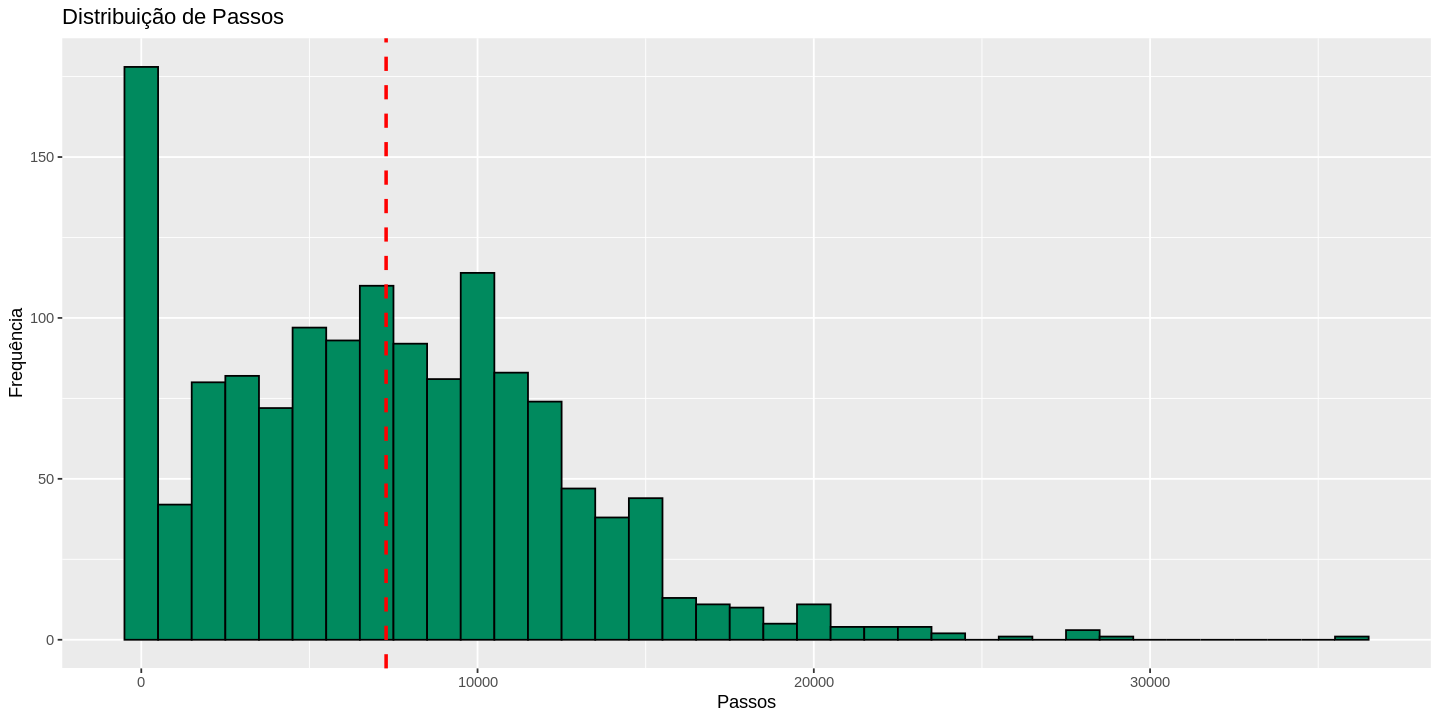

In [ ]:
# Calcular a média de passos.
mean_steps <- mean(daily_activity$total_steps, na.rm = TRUE)

# Cria um histograma para a variável de passos.
ggplot(daily_activity, aes(x = total_steps)) +
  geom_histogram(binwidth = 1000, fill = "#008A5E", color = "black") +
  geom_vline(xintercept = mean_steps, color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribuição de Passos", x = "Passos", y = "Frequência")

In [ ]:
# Cria um resumo estatístico com as principais medidas para calorias.
summary(daily_activity$calories)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1799    2114    2266    2770    4900 

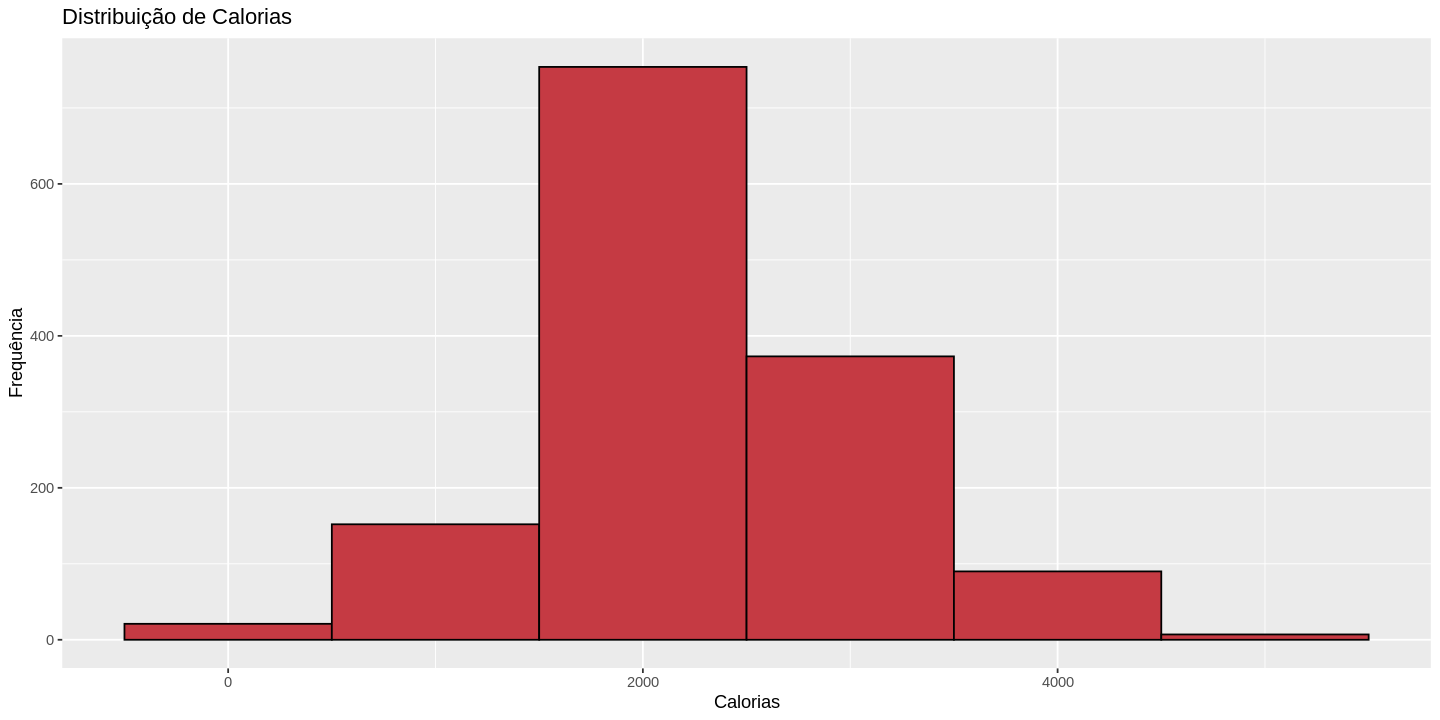

In [ ]:
# Cria um histograma para a variável calorias.
ggplot(daily_activity, aes(x = calories)) +
  geom_histogram(binwidth = 1000, fill = "#C53A43", color = "black") +
  labs(title = "Distribuição de Calorias", x = "Calorias", y = "Frequência")

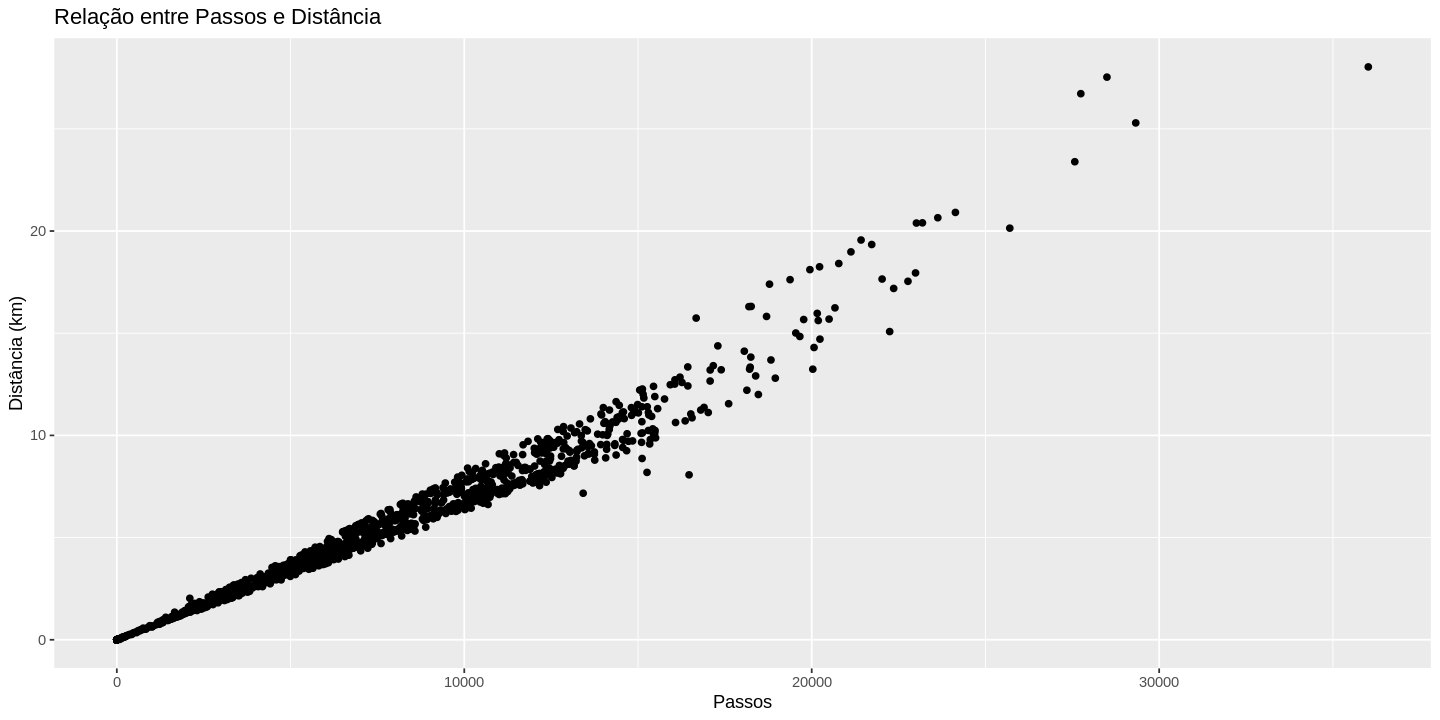

In [ ]:
# Cria um gráfico de dispersão para as variáveis passos e distância.
ggplot(data = daily_activity, aes(x = total_steps, y = total_distance)) +
  geom_point() +
  labs(title = "Relação entre Passos e Distância", x = "Passos", y = "Distância (km)")

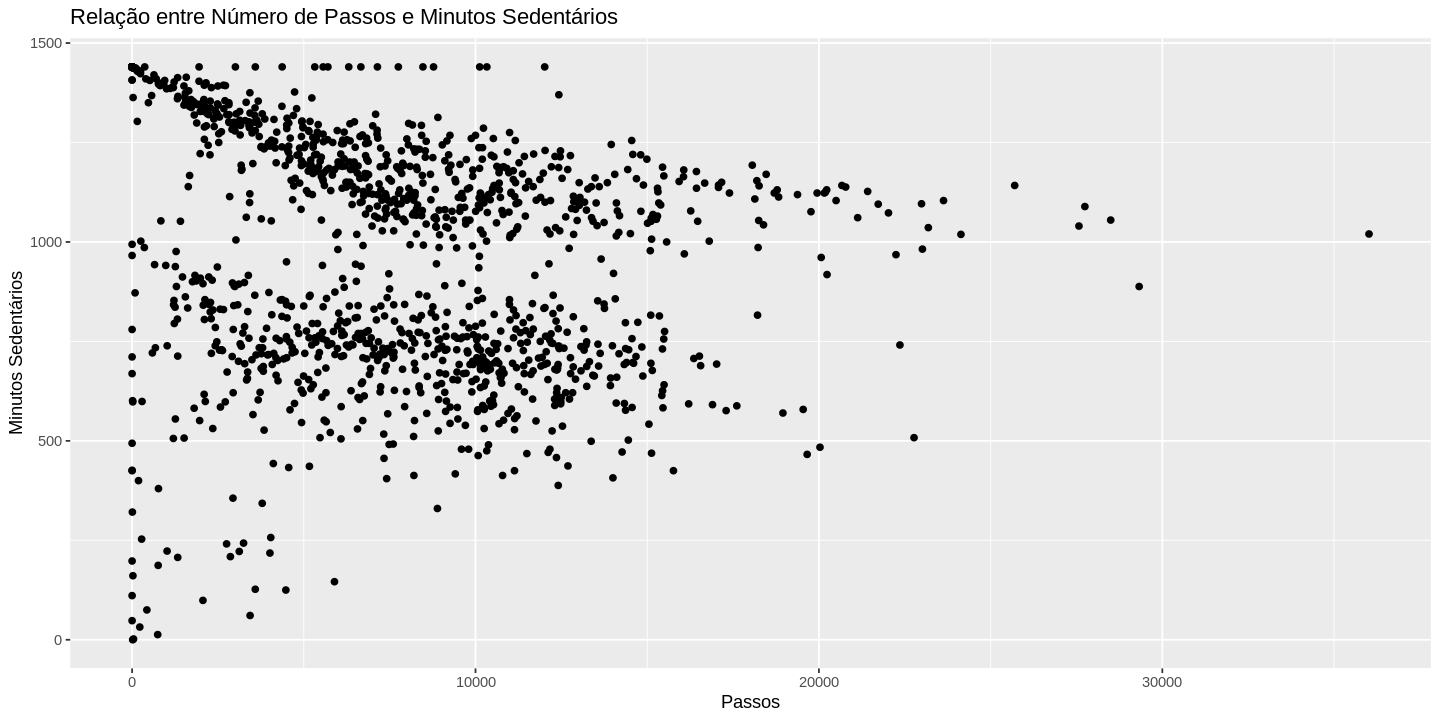

In [ ]:
# Cria um gráfico de dispersão para as variáveis passos e minutos sedentários.
ggplot(data=daily_activity, aes(x=total_steps, y=sedentary_minutes)) +
  geom_point() +
  labs(title = "Relação entre Número de Passos e Minutos Sedentários",
       x = "Passos", y = "Minutos Sedentários")

In [ ]:
# Agrega os dados por dia.
df_daily <- daily_activity %>%
  group_by(activity_date) %>%
  summarise(
    total_steps = sum(total_steps),
    total_distance = sum(total_distance),
    total_level_active_distance = sum(very_active_distance + moderately_active_distance + light_active_distance),
    total_minutes_active = sum(very_active_minutes + fairly_active_minutes + lightly_active_minutes)
  )

glimpse(df_daily)

Rows: 62
Columns: 5
$ activity_date               <date> 2016-03-12, 2016-03-13, 2016-03-14, 2016-…
$ total_steps                 <int> 5543, 3226, 11456, 5906, 14622, 8940, 1317…
$ total_distance              <dbl> 3.97, 2.31, 8.40, 4.23, 10.55, 6.41, 0.95,…
$ total_level_active_distance <dbl> 3.96, 2.28, 8.36, 4.20, 10.48, 0.61, 0.69,…
$ total_minutes_active        <int> 254, 136, 317, 225, 391, 47, 34, 0, 2, 46,…


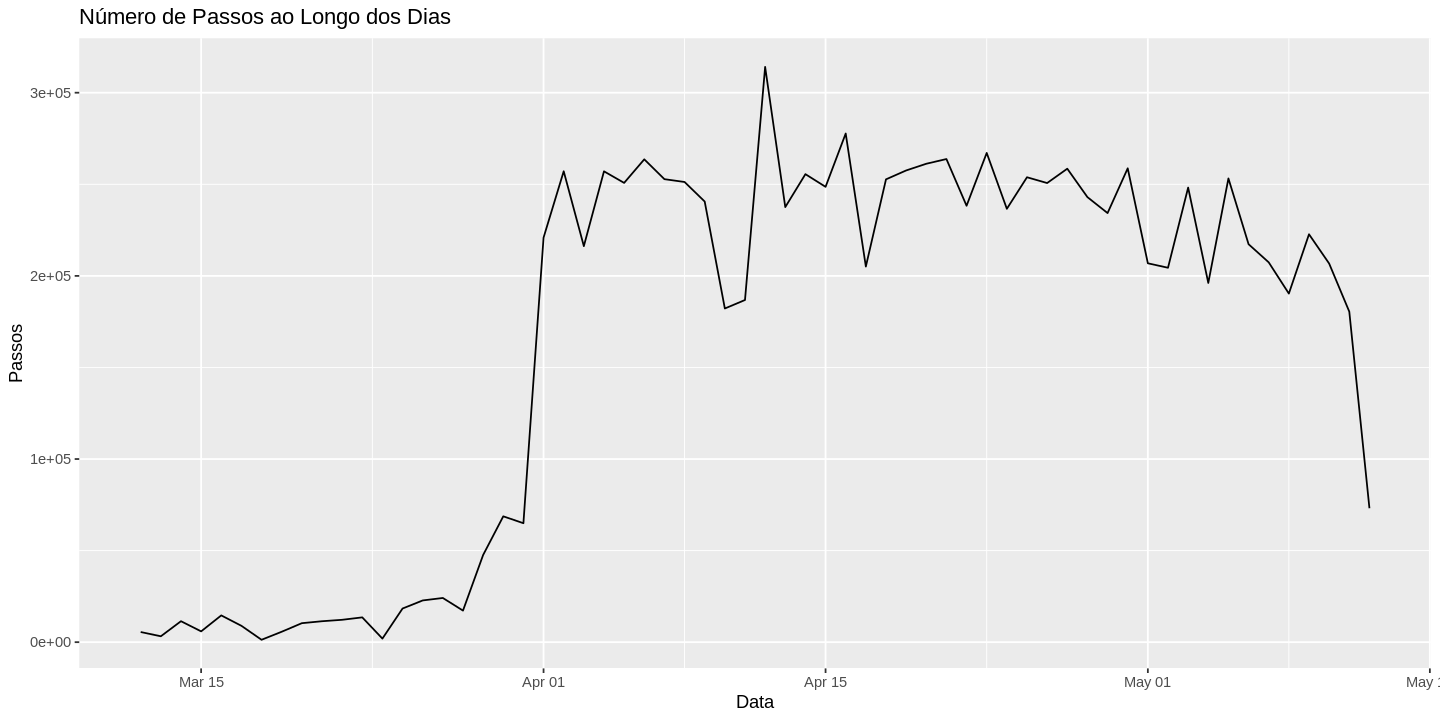

In [ ]:
# Cria um gráfico de linhas com o total de passos ao longo dos dias.
ggplot(df_daily, aes(x = activity_date, y = total_steps)) +
  geom_line() +
  labs(title = "Número de Passos ao Longo dos Dias", x = "Data", y = "Passos")

In [ ]:
# Define a largura e altura de todos os gráficos.
options(repr.plot.width=10, repr.plot.height=8)

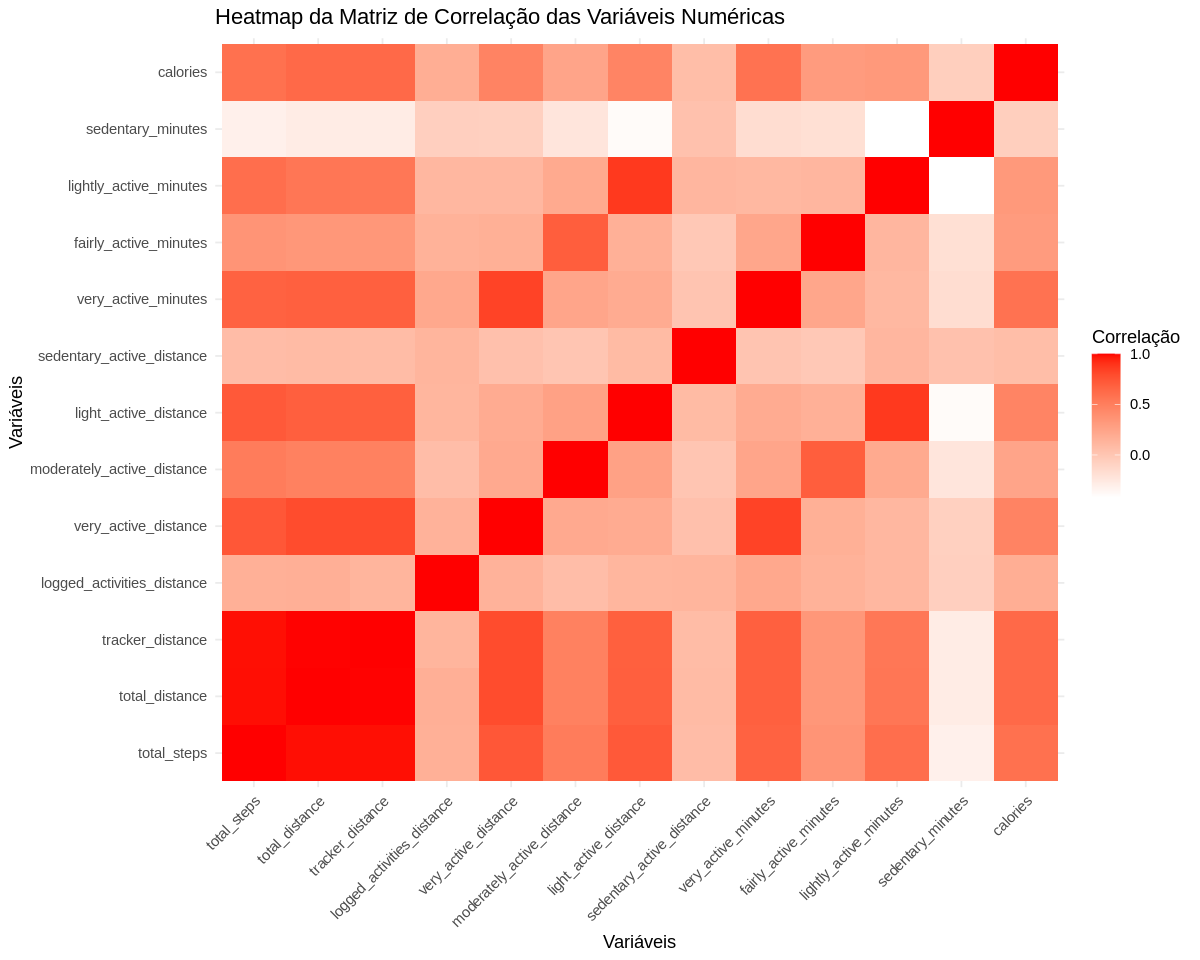

In [ ]:
# Seleciona apenas as variáveis numéricas.
dados_numericos <- daily_activity[, c("total_steps", "total_distance", "tracker_distance", "logged_activities_distance",
                                      "very_active_distance", "moderately_active_distance", "light_active_distance",
                                      "sedentary_active_distance", "very_active_minutes", "fairly_active_minutes",
                                      "lightly_active_minutes", "sedentary_minutes", "calories")]

# Calcula a matriz de correlação.
correlacao <- cor(dados_numericos)

# Transforma a matriz de correlação em um dataframe.
cor_df <- as.data.frame(as.table(correlacao))
names(cor_df) <- c("Var1", "Var2", "Correlation")

# Cria um heatmap da matriz de correlação.
ggplot(data = cor_df, aes(x = Var1, y = Var2, fill = Correlation)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Heatmap da Matriz de Correlação das Variáveis Numéricas",
       x = "Variáveis", y = "Variáveis", fill = "Correlação")

### Distâncias percorridas

In [ ]:
# Cria um resumo estatístico com as principais medidas de níveis de atividade por distância.
daily_activity %>%
  select(very_active_distance, moderately_active_distance, light_active_distance) %>%
  summary()

 very_active_distance moderately_active_distance light_active_distance
 Min.   : 0.000       Min.   :0.0000             Min.   : 0.000       
 1st Qu.: 0.000       1st Qu.:0.0000             1st Qu.: 1.610       
 Median : 0.100       Median :0.2000             Median : 3.240       
 Mean   : 1.397       Mean   :0.5385             Mean   : 3.193       
 3rd Qu.: 1.830       3rd Qu.:0.7700             3rd Qu.: 4.690       
 Max.   :21.920       Max.   :6.4800             Max.   :12.510       

In [ ]:
# Define a largura e altura de todos os gráficos.
options(repr.plot.width=12, repr.plot.height=6)

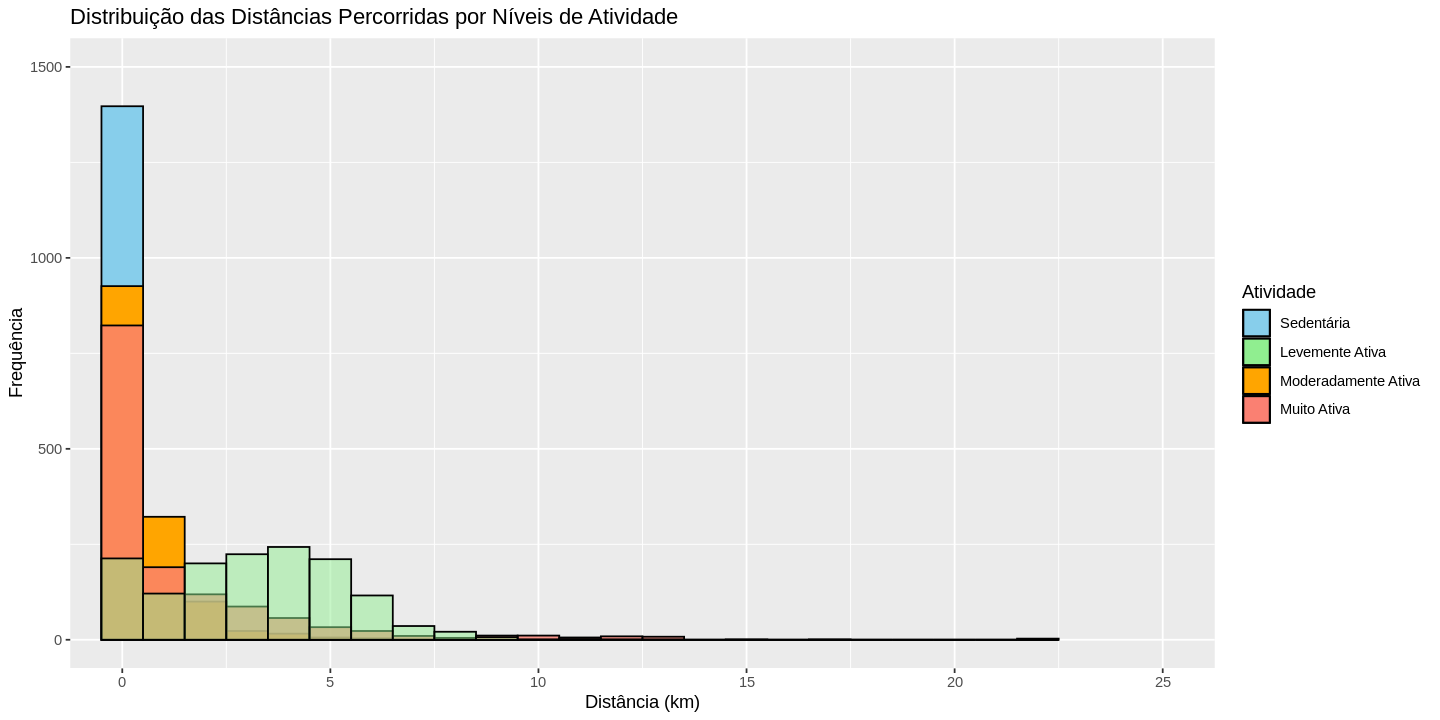

In [ ]:
# Cria o gráfico com as quatro variáveis, sobrepostas.
ggplot(daily_activity, aes(x = very_active_distance)) +
  geom_histogram(aes(x = sedentary_active_distance, fill = "sedentary"), binwidth = 1, color = "black", alpha = 1, position = "stack") +
  geom_histogram(aes(x = moderately_active_distance, fill = "moderately"), binwidth = 1, color = "black", alpha = 1, position = "stack") +
  geom_histogram(aes(x = very_active_distance, fill = "very"), binwidth = 1, color = "black", alpha = 0.8, position = "stack") +
  geom_histogram(aes(x = light_active_distance, fill = "light"), binwidth = 1, color = "black", alpha = 0.5, position = "stack") +
  labs(title = "Distribuição das Distâncias Percorridas por Níveis de Atividade",
       x = "Distância (km)", y = "Frequência") +
  scale_fill_manual(values = c("sedentary" = "skyblue", "light" = "lightgreen", "moderately" = "orange", "very" = "salmon"),
                    labels = c("Sedentária", "Levemente Ativa", "Moderadamente Ativa", "Muito Ativa"),
                    breaks = c("sedentary", "light", "moderately", "very")) +
  guides(fill = guide_legend(title = "Atividade")) +
  coord_cartesian(xlim = c(0, 25), ylim = c(0, 1500)) # Define os limites dos eixos x e y.

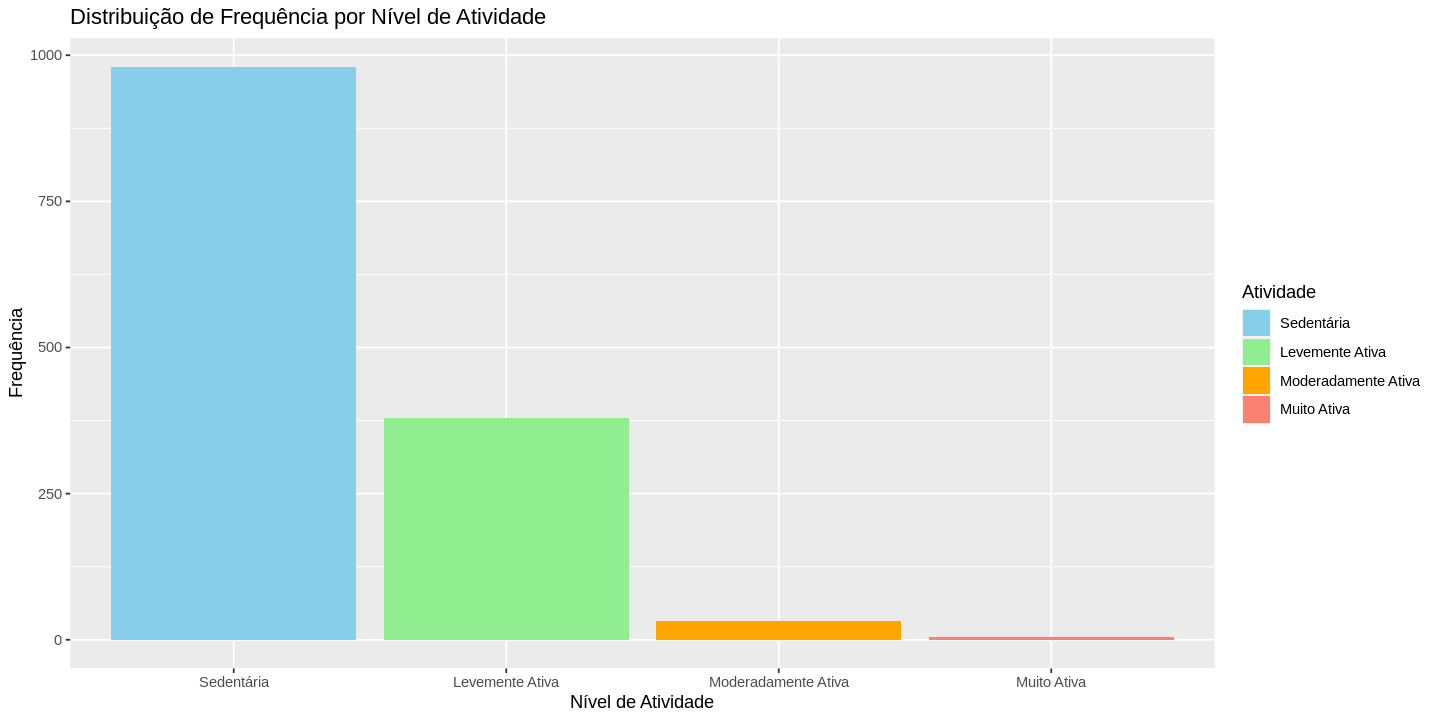

In [ ]:
# Cria uma nova variável com o nível de atividade por distância.
daily_activity$level_active_distance <- cut(rowSums(daily_activity[, c("very_active_distance", "moderately_active_distance", "light_active_distance", "sedentary_active_distance")]),
                          breaks = 4,
                          labels = c("Sedentária", "Levemente Ativa", "Moderadamente Ativa", "Muito Ativa"))

# Definir cores para cada nível de atividade.
cores <- c("Sedentária" = "skyblue", "Levemente Ativa" = "lightgreen", "Moderadamente Ativa" = "orange", "Muito Ativa" = "salmon")

# Cria um gráfico de barras para visualizar a distribuição de frequência por nível de atividade.
ggplot(daily_activity, aes(x = level_active_distance, fill = level_active_distance)) +
  geom_bar() +
  labs(title = "Distribuição de Frequência por Nível de Atividade", x = "Nível de Atividade", y = "Frequência") +
  scale_fill_manual(values = cores) +
  guides(fill = guide_legend(title = "Atividade")) +
  theme(legend.position = "right")  # Posiciona a legenda à direita.

In [ ]:
# Cria uma tabela de frequência dos registros níveis de atividade.
frequencia <- table(daily_activity$level_active_distance)

# Calcula o percentual de cada valor em relação ao total.
percentual <- prop.table(frequencia) * 100

# Exibe a frequência e o percentual em um novo dataframe.
level_active_distance <- data.frame(
  valor = names(frequencia),
  frequencia = as.numeric(frequencia),
  percentual = paste0(sprintf("%.2f", percentual), "%")
)

level_active_distance

valor,frequencia,percentual
<chr>,<dbl>,<chr>
Sedentária,980,70.15%
Levemente Ativa,380,27.20%
Moderadamente Ativa,32,2.29%
Muito Ativa,5,0.36%


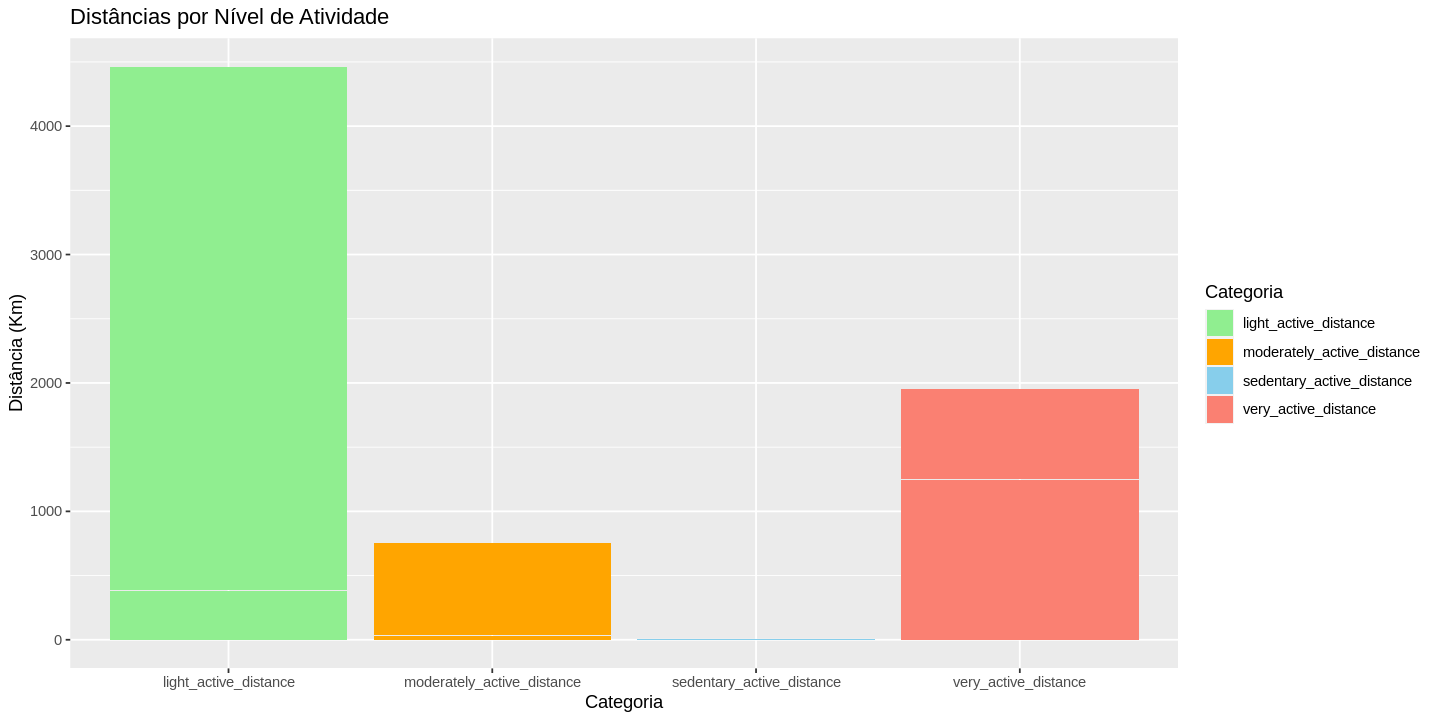

In [ ]:
# Cria um novo dataframe com as categorias e os valores para as variáveis de atividade por distância.
df_level_active_distance <- daily_activity %>%
  select(very_active_distance, moderately_active_distance, light_active_distance, sedentary_active_distance) %>%
  gather(key = "Categoria", value = "Valor")

# Cria o gráfico de barras com as categorias de distância.
ggplot(df_level_active_distance, aes(x = Categoria, y = Valor, fill = Categoria)) +
  geom_bar(stat = "identity") + # usa os valores das variáveis para calcular a altura da barra.
  labs(title = "Distâncias por Nível de Atividade", x = "Categoria", y = "Distância (Km)") +
  scale_fill_manual(values = c("lightgreen", "orange", "skyblue", "salmon"))

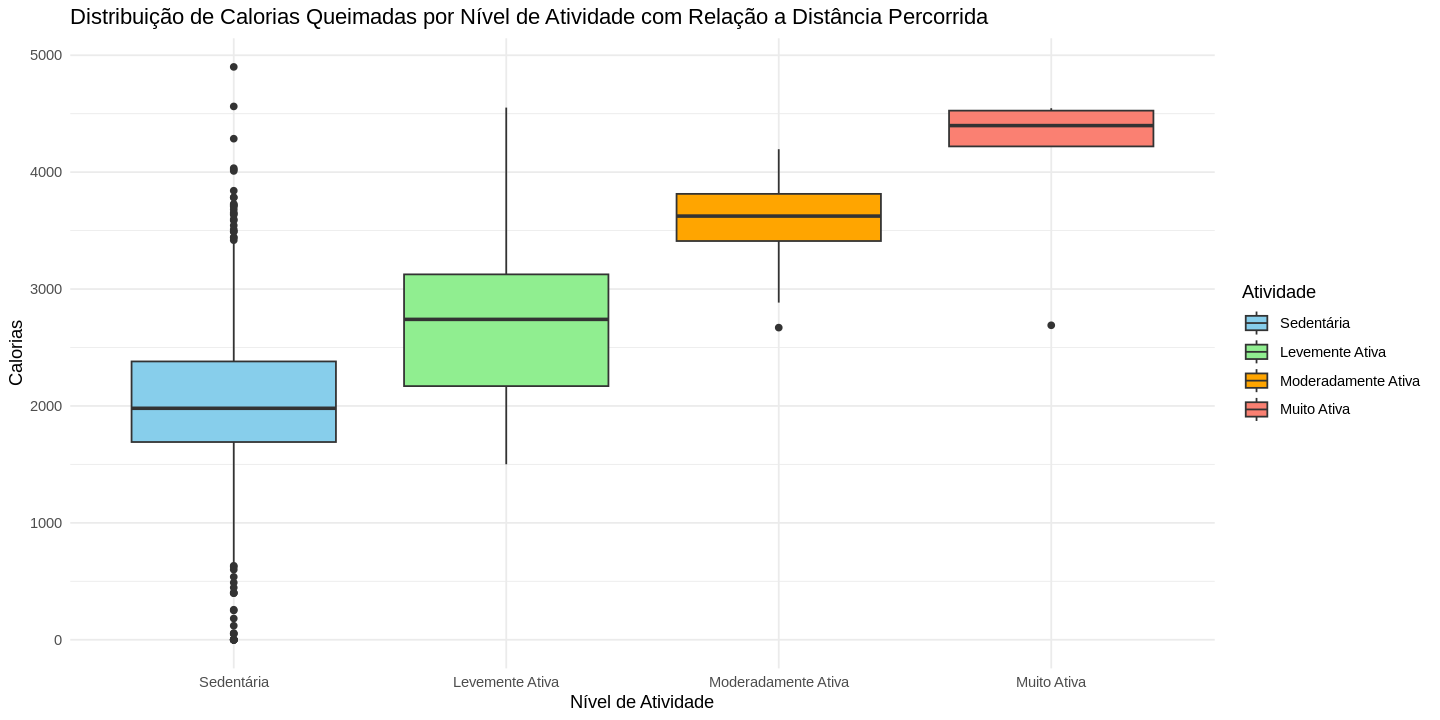

In [ ]:
# Cria um boxplot que mostra a distribuição das calorias queimadas para cada nível de atividade por minutos.
ggplot(daily_activity, aes(x = level_active_distance, y = calories, fill = level_active_distance)) +
  geom_boxplot() +
  labs(title = "Distribuição de Calorias Queimadas por Nível de Atividade com Relação a Distância Percorrida",
       x = "Nível de Atividade",
       y = "Calorias") +
  scale_fill_manual(values = c("Muito Ativa" = "salmon", "Moderadamente Ativa" = "orange", "Levemente Ativa" = "lightgreen", "Sedentária" = "skyblue")) +
  guides(fill = guide_legend(title = "Atividade")) +
  theme_minimal()

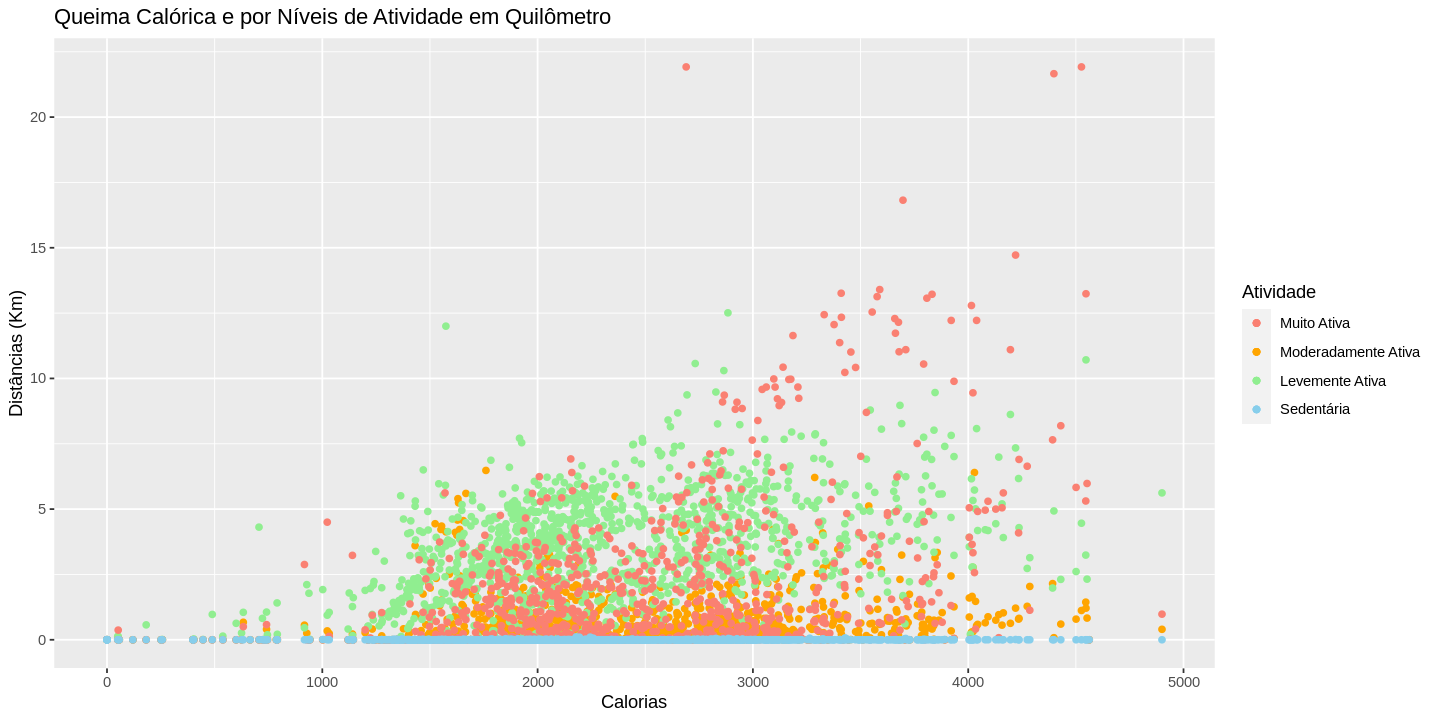

In [ ]:
# Cria um gráfico de dispersão para mostrar a relação entre calorias e níveis de atividades.
ggplot(daily_activity, aes(x = calories)) +
  geom_point(aes(y = moderately_active_distance, color = "moderately")) +
  geom_point(aes(y = light_active_distance, color = "light")) +
  geom_point(aes(y = very_active_distance, color = "very")) +
  geom_point(aes(y = sedentary_active_distance, color = "sedentary")) +
  guides(color = guide_legend(title = "Atividade")) +
  labs(title = "Queima Calórica e por Níveis de Atividade em Quilômetro", x = "Calorias", y = "Distâncias (Km)") +
  scale_color_manual(values = c("very" = "salmon", "moderately" = "orange", "light" = "lightgreen", "sedentary" = "skyblue"),
                     breaks = c("very", "moderately", "light", "sedentary"),
                     labels = c("very" = "Muito Ativa", "moderately" = "Moderadamente Ativa", "light" = "Levemente Ativa", "sedentary" = "Sedentária"))

### Tempo gasto

In [ ]:
# Cria novas variáveis com as variáveis de minutos convertidas para horas.
daily_activity <- daily_activity %>%
  mutate(very_active_hours = very_active_minutes / 60,
         fairly_active_hours = fairly_active_minutes / 60,
         lightly_active_hours = lightly_active_minutes / 60,
         sedentary_hours = sedentary_minutes / 60
  )

# Cria um resumo estatístico do dataframe com as principais medidas de níveis de atividade por minutos.
daily_activity %>%
  select(very_active_hours, fairly_active_hours, lightly_active_hours, sedentary_hours) %>%
  summary()

 very_active_hours fairly_active_hours lightly_active_hours sedentary_hours
 Min.   :0.00000   Min.   : 0.0000     Min.   : 0.000       Min.   : 0.00  
 1st Qu.:0.00000   1st Qu.: 0.0000     1st Qu.: 1.850       1st Qu.:12.15  
 Median :0.03333   Median : 0.1000     Median : 3.250       Median :17.62  
 Mean   :0.32799   Mean   : 0.2234     Mean   : 3.090       Mean   :16.54  
 3rd Qu.:0.50000   3rd Qu.: 0.3000     3rd Qu.: 4.367       3rd Qu.:20.73  
 Max.   :3.50000   Max.   :11.0000     Max.   :12.000       Max.   :24.00  

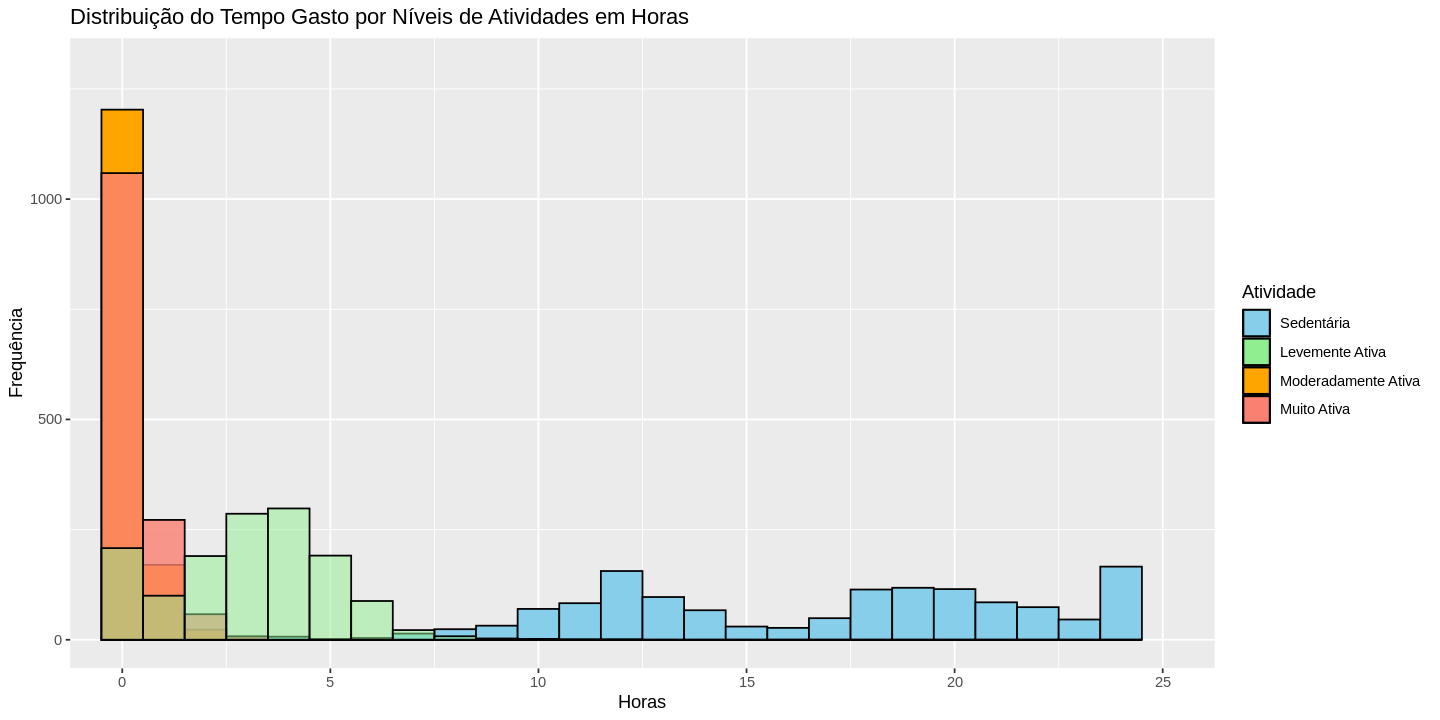

In [ ]:
# Cria o gráfico com as quatro variáveis, sobrepostas.
ggplot(daily_activity, aes(x = very_active_hours)) +
  geom_histogram(aes(x = sedentary_hours, fill = "sedentary"), binwidth = 1, color = "black", alpha = 1, position = "stack") +
  geom_histogram(aes(x = fairly_active_hours, fill = "moderately"), binwidth = 1, color = "black", alpha = 1, position = "stack") +
  geom_histogram(aes(x = very_active_hours, fill = "very"), binwidth = 1, color = "black", alpha = 0.8, position = "stack") +
  geom_histogram(aes(x = lightly_active_hours, fill = "light"), binwidth = 1, color = "black", alpha = 0.5, position = "stack") +
  labs(title = "Distribuição do Tempo Gasto por Níveis de Atividades em Horas",
       x = "Horas", y = "Frequência") +
  scale_fill_manual(values = c("sedentary" = "skyblue", "light" = "lightgreen", "moderately" = "orange", "very" = "salmon"),
                    labels = c("Sedentária", "Levemente Ativa", "Moderadamente Ativa", "Muito Ativa"),
                    breaks = c("sedentary", "light", "moderately", "very")) +
  guides(fill = guide_legend(title = "Atividade")) +
  coord_cartesian(xlim = c(0, 25), ylim = c(0, 1300))

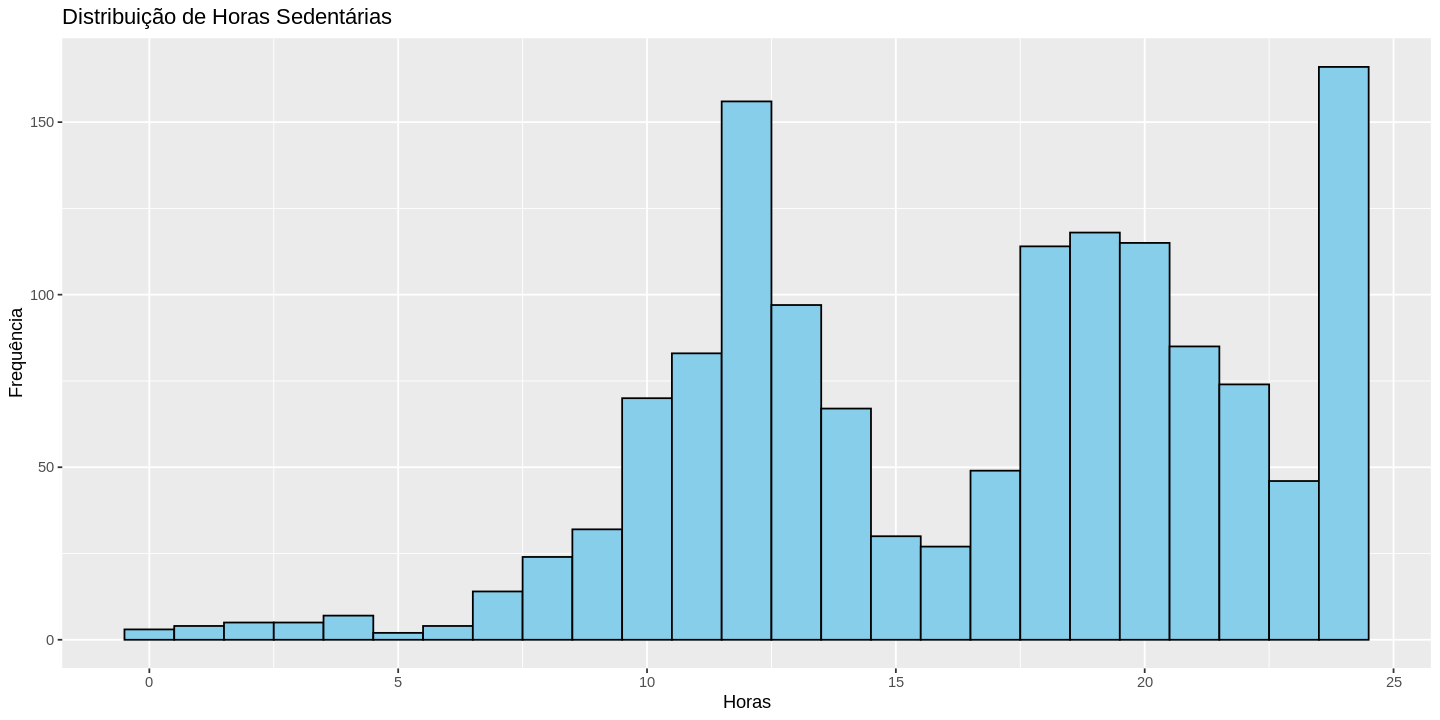

In [ ]:
# Cria um histograma para a variável de horas sedentárias.
ggplot(daily_activity, aes(x = sedentary_hours)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribuição de Horas Sedentárias", x = "Horas", y = "Frequência")

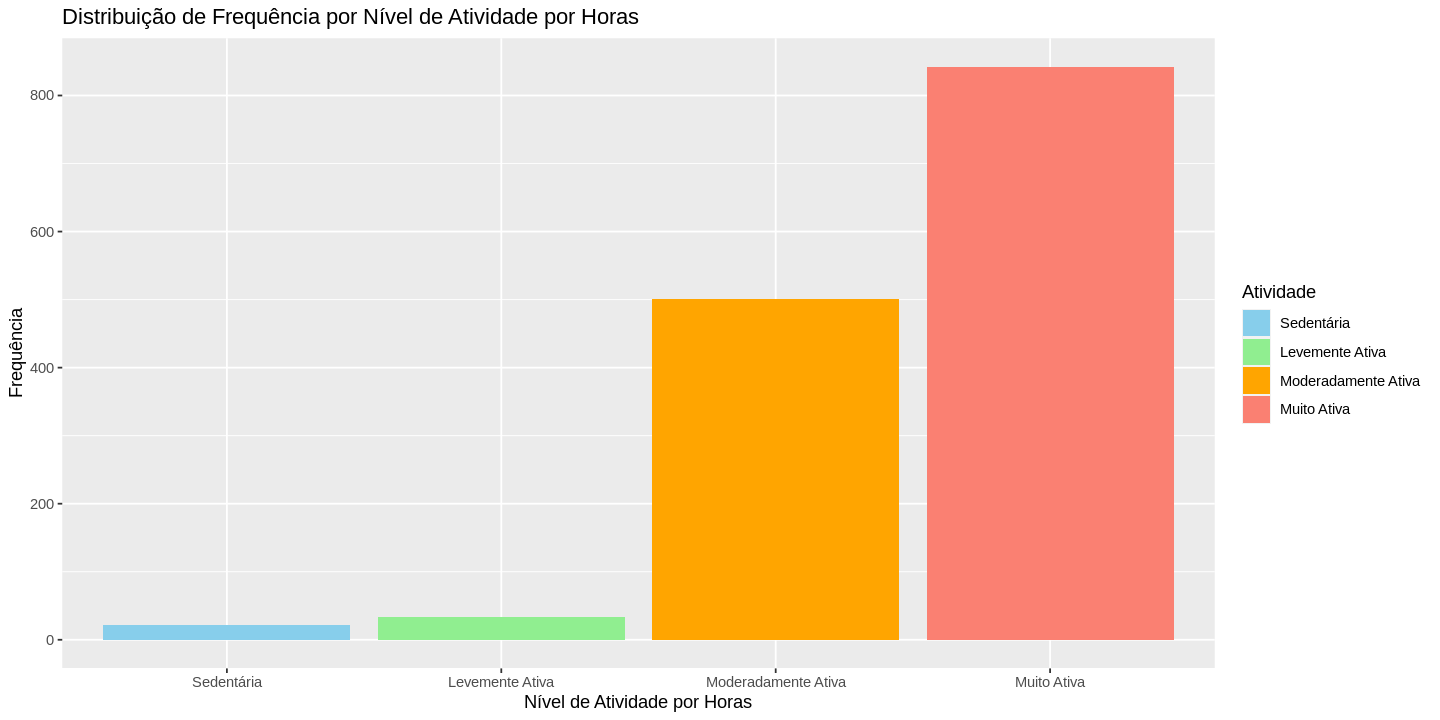

In [ ]:
# Cria uma nova variável com o nível de atividade por horas.
daily_activity$level_active_hours <- cut(rowSums(daily_activity[, c("very_active_hours", "fairly_active_hours", "lightly_active_hours", "sedentary_hours")]),
                          breaks = 4,
                          labels = c("Sedentária", "Levemente Ativa", "Moderadamente Ativa", "Muito Ativa"))

# Define cores para cada nível de atividade.
cores <- c("Sedentária" = "skyblue", "Levemente Ativa" = "lightgreen", "Moderadamente Ativa" = "orange", "Muito Ativa" = "salmon")

# Cria um gráfico de barras para visualizar a distribuição de frequência por nível de atividade.
ggplot(daily_activity, aes(x = level_active_hours, fill = level_active_hours)) +
  geom_bar() +
  labs(title = "Distribuição de Frequência por Nível de Atividade por Horas", x = "Nível de Atividade por Horas", y = "Frequência") +
  scale_fill_manual(values = cores) +
  guides(fill = guide_legend(title = "Atividade")) +
  theme(legend.position = "right")  # Posiciona a legenda à direita.

In [ ]:
# Cria uma tabela de frequência dos registros níveis de atividade.
frequencia <- table(daily_activity$level_active_hours)

# Calcula o percentual de cada valor em relação ao total.
percentual <- prop.table(frequencia) * 100

# Exibe a frequência e o percentual em um novo dataframe.
level_active_hours <- data.frame(
  valor = names(frequencia),
  frequencia = as.numeric(frequencia),
  percentual = paste0(sprintf("%.2f", percentual), "%")
)

level_active_hours

valor,frequencia,percentual
<chr>,<dbl>,<chr>
Sedentária,21,1.50%
Levemente Ativa,33,2.36%
Moderadamente Ativa,501,35.86%
Muito Ativa,842,60.27%


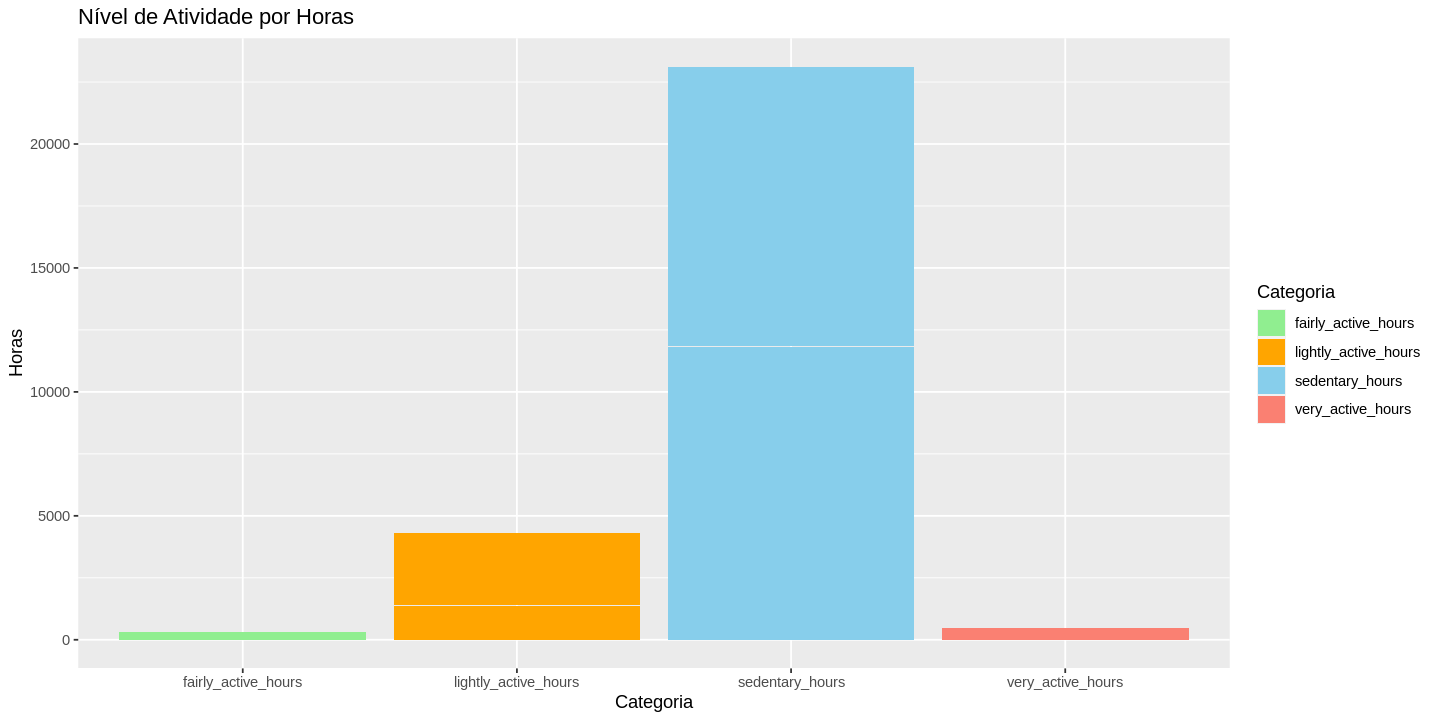

In [ ]:
# Cria um novo dataframe com as categorias e os valores para as variáveis de atividade por distância.
df_level_active_distance <- daily_activity %>%
  select(very_active_hours, fairly_active_hours, lightly_active_hours, sedentary_hours) %>%
  gather(key = "Categoria", value = "Valor")

# Cria o gráfico de barras com as categorias de distância.
ggplot(df_level_active_distance, aes(x = Categoria, y = Valor, fill = Categoria)) +
  geom_bar(stat = "identity") + # usa os valores das variáveis para calcular a altura da barra.
  labs(title = "Nível de Atividade por Horas", x = "Categoria", y = "Horas") +
  scale_fill_manual(values = c("lightgreen", "orange", "skyblue", "salmon"))

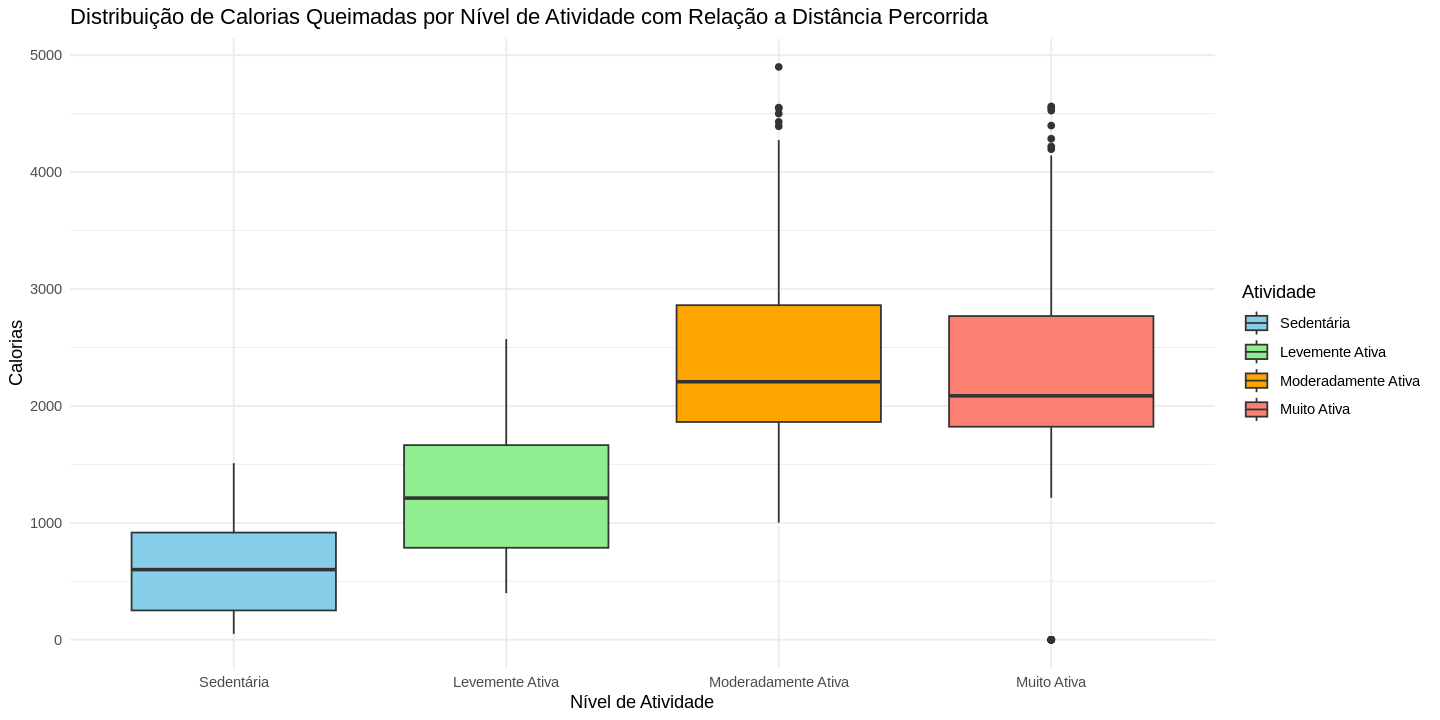

In [ ]:
# Cria um boxplot que mostra a distribuição das calorias queimadas para cada nível de atividade por minutos.
ggplot(daily_activity, aes(x = level_active_hours, y = calories, fill = level_active_hours)) +
  geom_boxplot() +
  labs(title = "Distribuição de Calorias Queimadas por Nível de Atividade com Relação a Distância Percorrida",
       x = "Nível de Atividade",
       y = "Calorias") +
  scale_fill_manual(values = c("Muito Ativa" = "salmon", "Moderadamente Ativa" = "orange", "Levemente Ativa" = "lightgreen", "Sedentária" = "skyblue")) +
  guides(fill = guide_legend(title = "Atividade")) +
  theme_minimal()

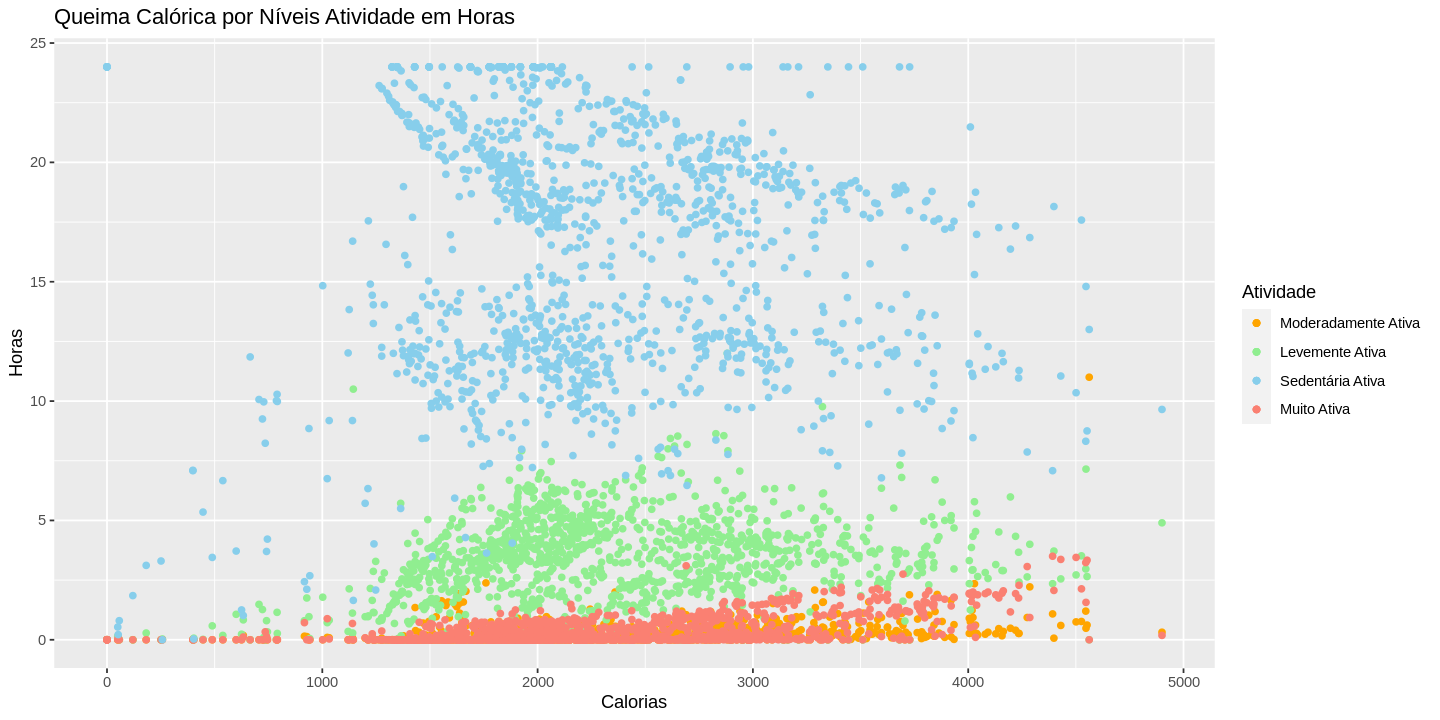

In [ ]:
# Cria um gráfico de dispersão para mostrar a relação entre calorias e níveis de atividades.
ggplot(daily_activity, aes(x = calories)) +
  geom_point(aes(y = fairly_active_hours, color = "fairly")) +
  geom_point(aes(y = lightly_active_hours, color = "light")) +
  geom_point(aes(y = very_active_hours, color = "very")) +
  geom_point(aes(y = sedentary_hours, color = "sedentary")) +
  guides(color = guide_legend(title = "Atividade")) +
  labs(title = "Queima Calórica por Níveis Atividade em Horas", x = "Calorias", y = "Horas") +
  scale_color_manual(values = c("very" = "salmon", "fairly" = "orange", "light" = "lightgreen", "sedentary" = "skyblue"),
                     labels = c("very" = "Muito Ativa", "fairly" = "Moderadamente Ativa", "light" = "Levemente Ativa", "sedentary" = "Sedentária Ativa"))

## Informações de frequência cardíaca

In [ ]:
# Cria um resumo estatístico com as principais medidas de frequência cardíaca.
summary(heartrate_seconds$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  46.00   67.00   75.00   77.86   85.00  182.00       1 

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”


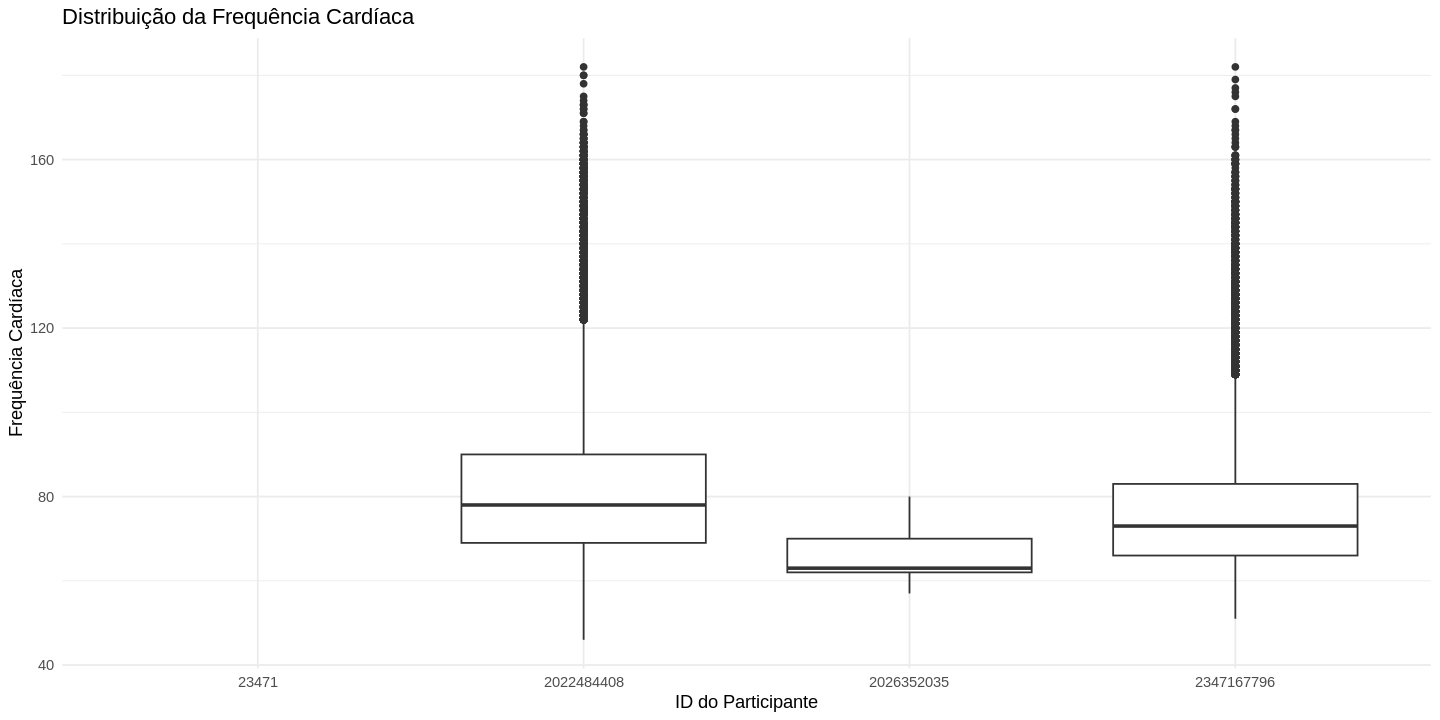

In [ ]:
# Crie o boxplot.
ggplot(heartrate_seconds, aes(x = factor(id), y = value)) +
  geom_boxplot() +
  labs(title = "Distribuição da Frequência Cardíaca",
       x = "ID do Participante",
       y = "Frequência Cardíaca") +
  theme_minimal()

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


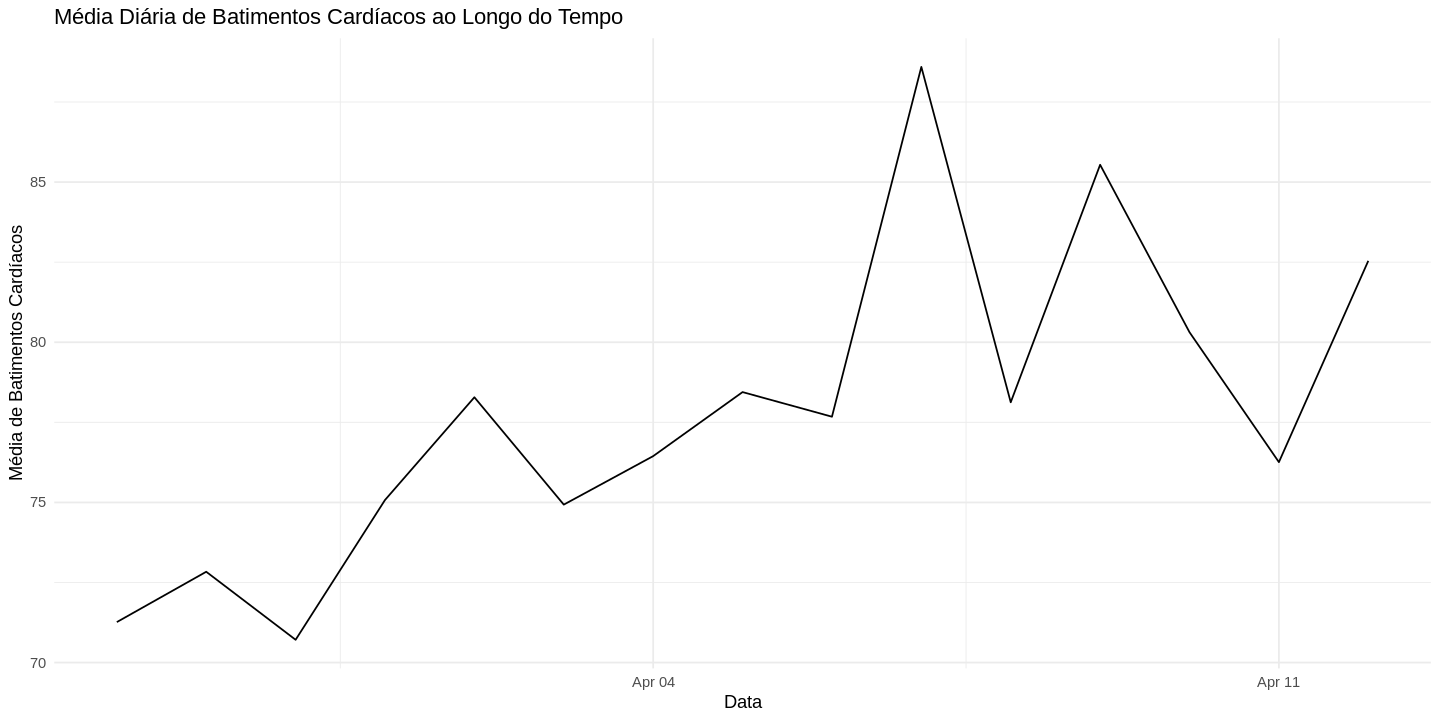

In [ ]:
# Agrupa os dados por dia e calcula a média dos batimentos cardíacos.
heartrate_daily <- heartrate_seconds %>%
  group_by(date = as.Date(time)) %>%
  summarise(mean_hr = mean(value, na.rm = TRUE))

# Cria um gráfico de séries temporais com a média dos barimentos.
ggplot(heartrate_daily, aes(x = date, y = mean_hr)) +
  geom_line() +
  labs(title = "Média Diária de Batimentos Cardíacos ao Longo do Tempo",
       x = "Data",
       y = "Média de Batimentos Cardíacos") +
  theme_minimal()

## Informações de peso

In [ ]:
# Cria um resumo estatístico com as principais medidas das variáveis especificadas como parâmentro.
weight_info %>%
  select(weight_kg, fat, bmi) %>%
  summary()

   weight_kg           fat             bmi       
 Min.   : 52.60   Min.   :10.00   Min.   :21.45  
 1st Qu.: 61.50   1st Qu.:19.00   1st Qu.:24.00  
 Median : 62.50   Median :22.00   Median :24.39  
 Mean   : 72.47   Mean   :19.75   Mean   :25.37  
 3rd Qu.: 85.25   3rd Qu.:22.75   3rd Qu.:25.59  
 Max.   :133.50   Max.   :25.00   Max.   :47.54  
                  NA's   :94                     

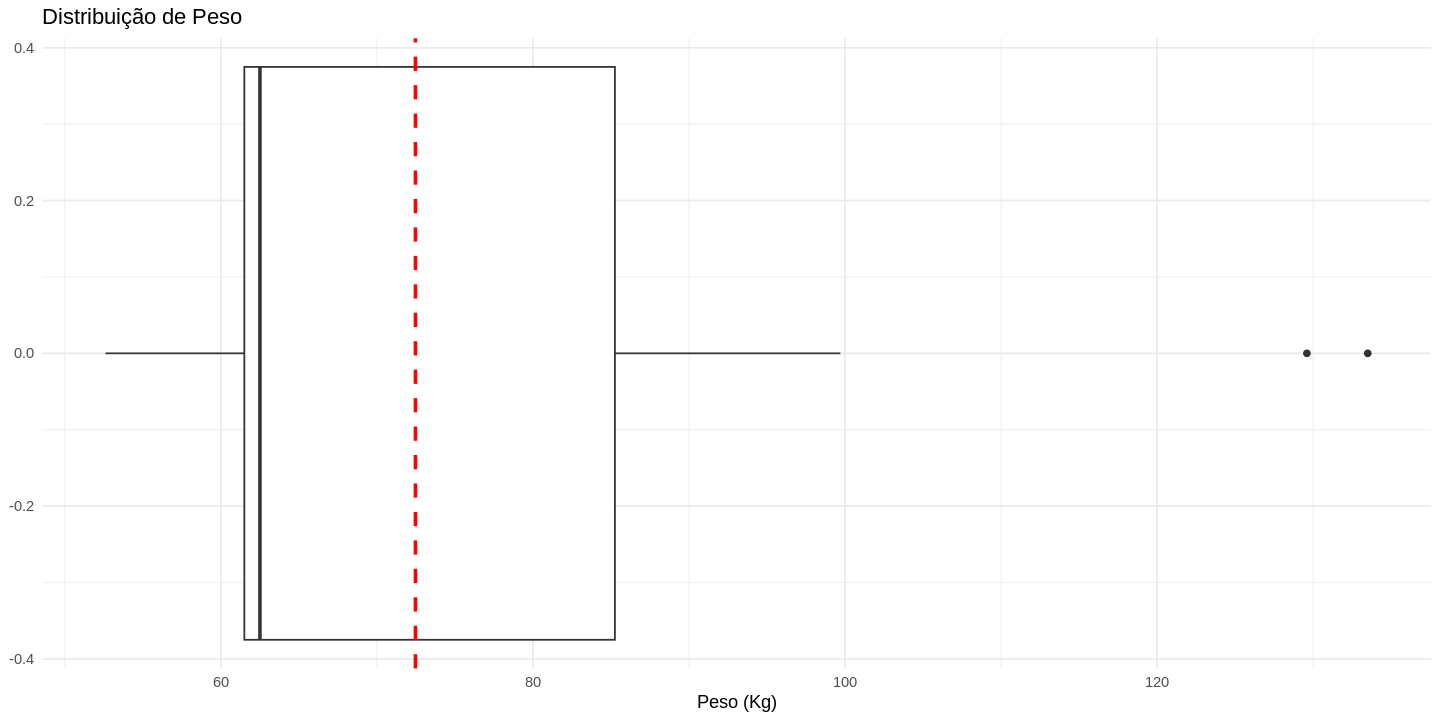

In [ ]:
# Calcular a média dos batimentos cardíacos.
mean_kg <- mean(weight_info$weight_kg, na.rm = TRUE)

# Crie o boxplot
ggplot(weight_info, aes(x = weight_kg)) +
  geom_boxplot() +
  geom_vline(xintercept = mean_kg, color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribuição de Peso", x = "Peso (Kg)") +
  theme_minimal()

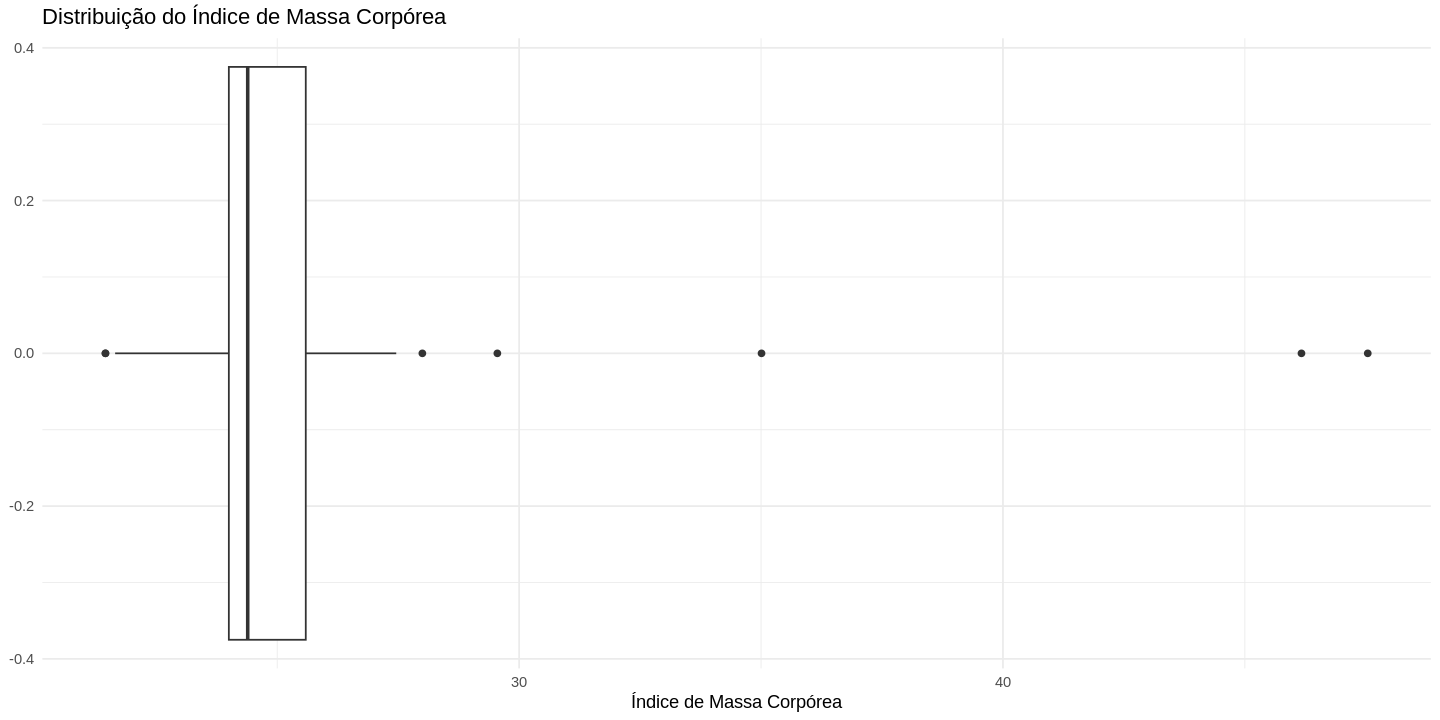

In [ ]:
# Cria um boxplot com o ídice de massa corpórea (bmi).
ggplot(weight_info, aes(x = bmi)) +
  geom_boxplot() +
  labs(title = "Distribuição do Índice de Massa Corpórea", x = "Índice de Massa Corpórea") +
  theme_minimal()

In [ ]:
# Calcula a frequência de registros manuais.
frequencia <- table(weight_info$is_manual_report)

# Calcula o percentual de cada valor em relação ao total.
percentual <- prop.table(frequencia) * 100

# Exibe a frequência e o percentual em um dataframe.
resultado <- data.frame(valor = names(frequencia), frequencia = as.numeric(frequencia), percentual = paste0(sprintf("%.2f", percentual), "%"))
resultado

valor,frequencia,percentual
<chr>,<dbl>,<chr>
False,35,35.71%
True,63,64.29%


## Informações de sono

In [ ]:
# Cria novas variáveis com "total_minutes_asleep" e "total_time_in_bed" convertidos para horas.
sleep_day <- sleep_day %>%
  mutate(total_hours_asleep = total_minutes_asleep / 60,
         total_hours_in_bed = total_time_in_bed / 60
  )

# Cria um resumo estatístico com as principais medidas estatíticas em horas.
sleep_day %>%
  select(total_hours_asleep, total_hours_in_bed) %>%
  summary()

 total_hours_asleep total_hours_in_bed
 Min.   : 0.9667    Min.   : 1.017    
 1st Qu.: 6.0167    1st Qu.: 6.729    
 Median : 7.2083    Median : 7.717    
 Mean   : 6.9862    Mean   : 7.641    
 3rd Qu.: 8.1667    3rd Qu.: 8.767    
 Max.   :13.2667    Max.   :16.017    

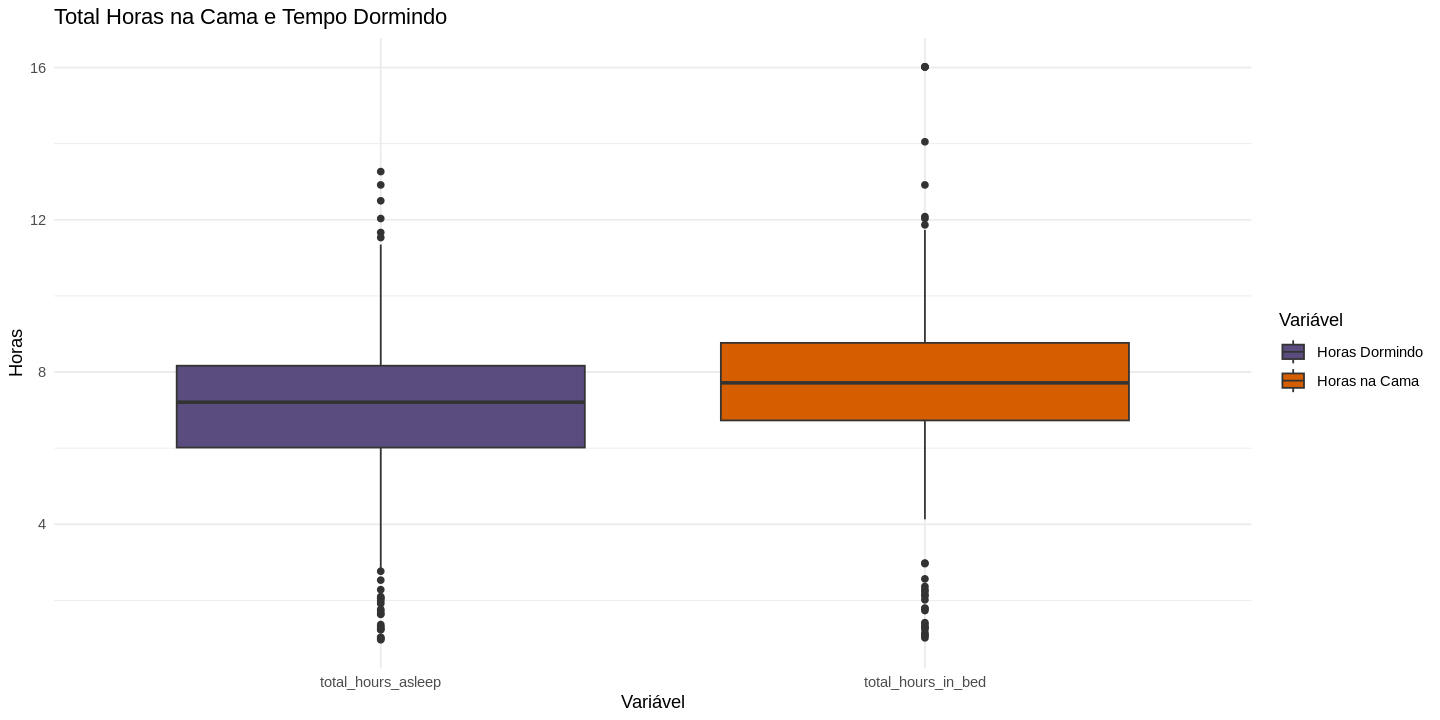

In [ ]:
# Altera os dados para formato longo.
sleep_day_long <- sleep_day %>%
  pivot_longer(cols = c(total_hours_asleep, total_hours_in_bed),
               names_to = "variavel",
               values_to = "horas")

# Cria um boxplot com as variáveis horas domindo e horas na cama.
ggplot(sleep_day_long, aes(x = variavel, y = horas, fill = variavel)) +
  geom_boxplot() +
  labs(title = "Total Horas na Cama e Tempo Dormindo", x = "Variável", y = "Horas") +
  scale_fill_manual(values = c("total_hours_asleep" = "#5B4C80", "total_hours_in_bed" = "#D55E00"),
                    name = "Variável",
                    labels = c("Horas Dormindo", "Horas na Cama")) +
  guides(fill = guide_legend(title = "Variável")) +
  theme_minimal()

In [ ]:
# Cria uma tabela de frequência dos registros de sono.
frequencia <- table(sleep_day$total_sleep_records)

# Calcula o percentual de cada valor em relação ao total.
percentual <- prop.table(frequencia) * 100

# Exibe a frequência e o percentual em um dataframe.
resultado <- data.frame(
  valor = names(frequencia),
  frequencia = as.numeric(frequencia),
  percentual = paste0(sprintf("%.2f", percentual), "%")
)

resultado

valor,frequencia,percentual
<chr>,<dbl>,<chr>
1,364,88.78%
2,43,10.49%
3,3,0.73%


## Resumo do processo de análise

- **Resumo estatístico e correlação:** Comecei com um resumo estatístico das variáveis utilizando `summary()` e a função `cor()` para obter uma matriz de correlação das variáveis do dataframe.

- **Agregação dos dados:** Realizei a agregação dos dados em dias e semanas com `group_by()` e criei resumos personalizados com `summarise()`.

- **Criação de novas colunas:** Utilizei a função `mutate()` para criar novas colunas no dataframe com valores convertidos a partir de outras variáveis e a função `wday()` para extrar o dia da semana de uma variável do tipo data.

- **Seleção de variáveis:** Criei novos dataframes com variáveis específicas utilizando a função `select()`.

- **Cálculos agregados:** Utilizei a função `aggregate()` para calcular a média diária das variáveis de atividade física.

- **Cálculos de média:** Calculei a média utilizando a função `mean()` com o argumento `na.rm` para desconsiderar os valores ausentes.

- **Frequência de valores categóricos:** Utilizei a função `table()` para calcular a frequência de valores categóricos e `prop.table()` para a proporção.

- **Visualização dos dados:** Para a visualização dos dados, utilizei `ggplot()` para criar gráficos de histograma, barras, dispersão, linhas, mapa de calor e boxplot. Utilizei também a função `options()` para definir o tamanho das imagens.

# COMPARTILHAR

### **Atividade diária**
Analisando o dataset com informações de atividades diárias dos 35 participantes, é possível verificar que a média é 7.281 passos e a mediana 6.999, e a distância média percorrida é de 5.219 km. Percebe-se uma forte correlação positiva entre o número de passos e a distância percorrida, enquanto os minutos sedentários tendem a diminuir com o aumento do número de passos. Analisando a distribuição dos passos é possível perceber uma grande quantidade de registros iguais a zero. Com relação à queima calórica, os valores estão entre 1.799 e 2.770, com uma média de 2.266 calorias diárias. Também é possível perceber uma correlação positiva entre o número de passos e a queima calórica.  
Ao observar os dados dia a dia, nota-se um aumento significativo no número de passos em um período curto de aproximadamente 15 dias, o que também ocorre com as distâncias agrupadas semanalmente.

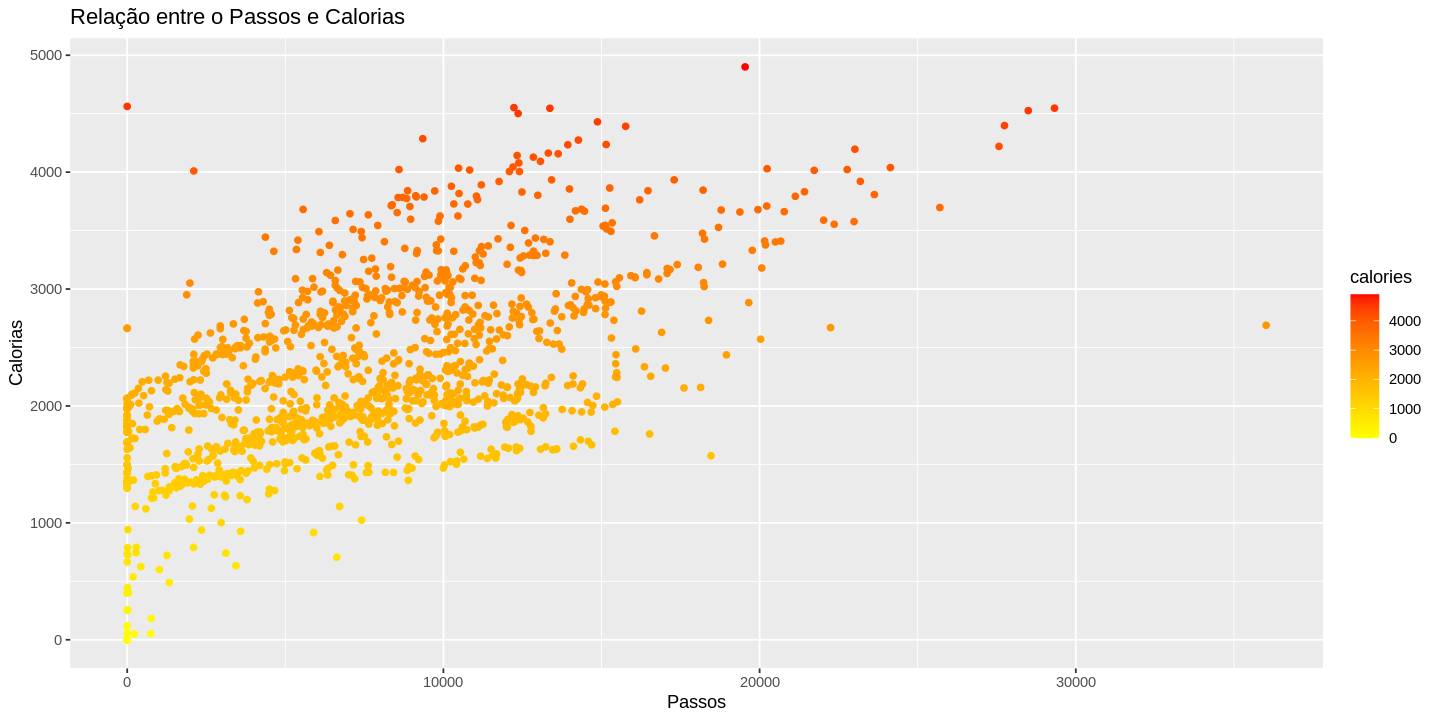

In [ ]:
# Cria um gráfico de dispersão com as variáveis passos e calorias.
ggplot(data = daily_activity, aes(x = total_steps, y = calories, color = calories)) +
  geom_point() +
  labs(title = "Relação entre o Passos e Calorias",
       x = "Passos", y = "Calorias") +
  scale_color_gradient(low = "yellow", high = "red") # Define a escala de cores.

In [ ]:
# Agregar os dados por semana.
week_activity <- daily_activity %>%
  mutate(week = lubridate::week(activity_date)) %>%
  group_by(week) %>%
  summarise(
    total_steps = sum(total_steps),
    total_distance = sum(total_distance),
    total_active_distance = sum(very_active_distance + moderately_active_distance + light_active_distance),
    total_minutes_active = sum(very_active_minutes + fairly_active_minutes + lightly_active_minutes)
  )

glimpse(week_activity)

Rows: 9
Columns: 5
$ week                  <dbl> 11, 12, 13, 14, 15, 16, 17, 18, 19
$ total_steps           <int> 49693, 56560, 263839, 1718524, 1668075, 1766716,…
$ total_distance        <dbl> 35.87, 40.96, 180.47, 1229.10, 1195.45, 1273.45,…
$ total_active_distance <dbl> 29.89, 12.03, 166.69, 1227.22, 1173.31, 1253.44,…
$ total_minutes_active  <int> 1370, 456, 7626, 54086, 50067, 51930, 53194, 477…


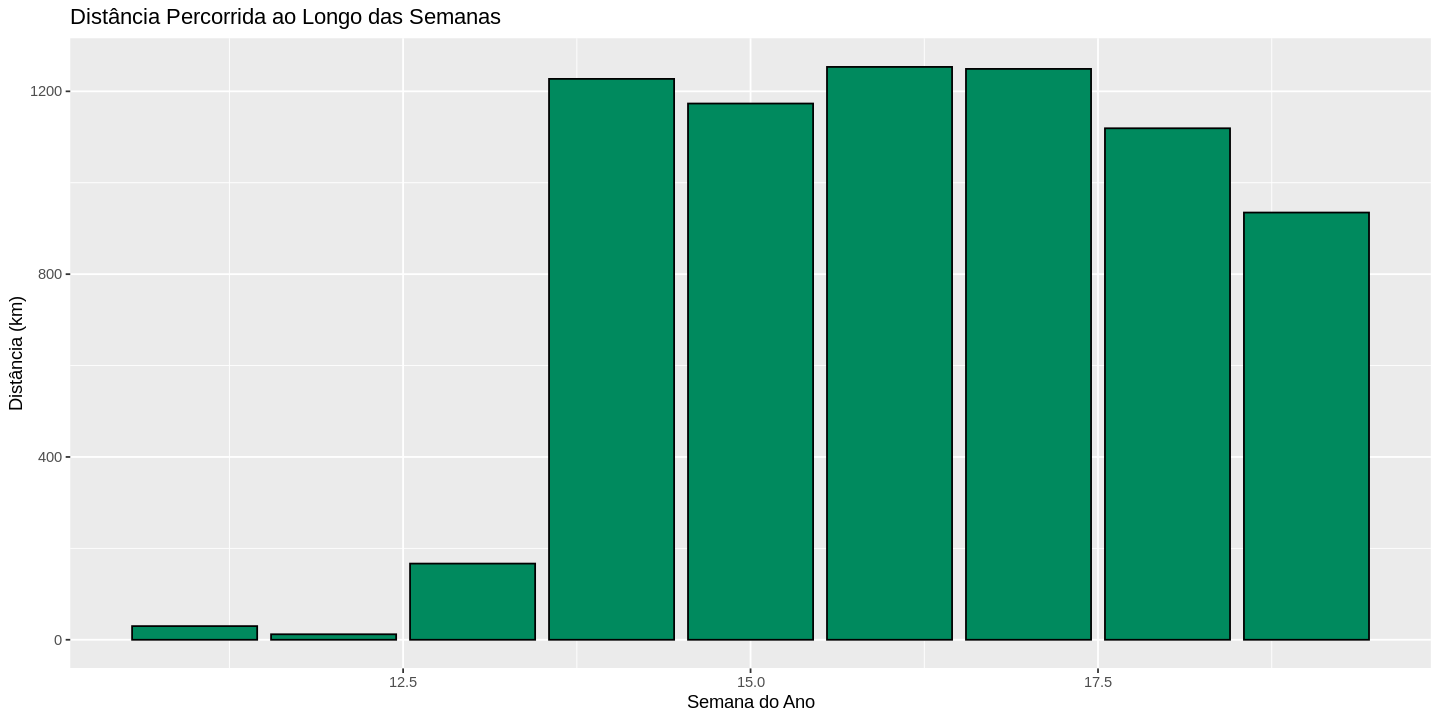

In [ ]:
# Cria um gráfico de barras com o total de distância percorrida ao longo das semanas.
ggplot(week_activity, aes(x = week, y = total_active_distance)) +
  geom_bar(stat = "identity", fill = "#008A5E", color = "black") +
  labs(title = "Distância Percorrida ao Longo das Semanas", x = "Semana do Ano", y = "Distância (km)")

**Distância percorrida**  
Ao analisar as variáveis de distância, percebe-se uma frequência alta para distâncias iguais a 0 em quase todas as variáveis, com destaque para a atividade sedentária. A única exceção é a variável Levemente Ativa, que apresenta uma distribuição melhor, variando de 0 a aproximadamente 8 km, com uma média de 3.193 km, superior às médias de 1.397 e 0.5385 para Muito Ativo e Moderadamente Ativo, respectivamente. Ao analisar a frequência agrupada por tipo de atividade, nota-se claramente que a atividade Sedentária é a mais frequente, enquanto a Muito Ativa é a menos frequente. Ao comparar a distribuição de calorias queimadas por nível de atividade, percebe-se claramente que as calorias queimadas são maiores conforme aumenta a intensidade da atividade, mas ao avaliar a relação da queima calórica com a distância percebe-se que a atividade Levemente Ativa tem uma correlação levemente mais positiva que Muito Ativa e Moderadamente Ativa. Ao avaliar a média das distâncias por dia da semana, percebemos que apenas a atividades Muito Ativa não mantém uma constância diária.

`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.


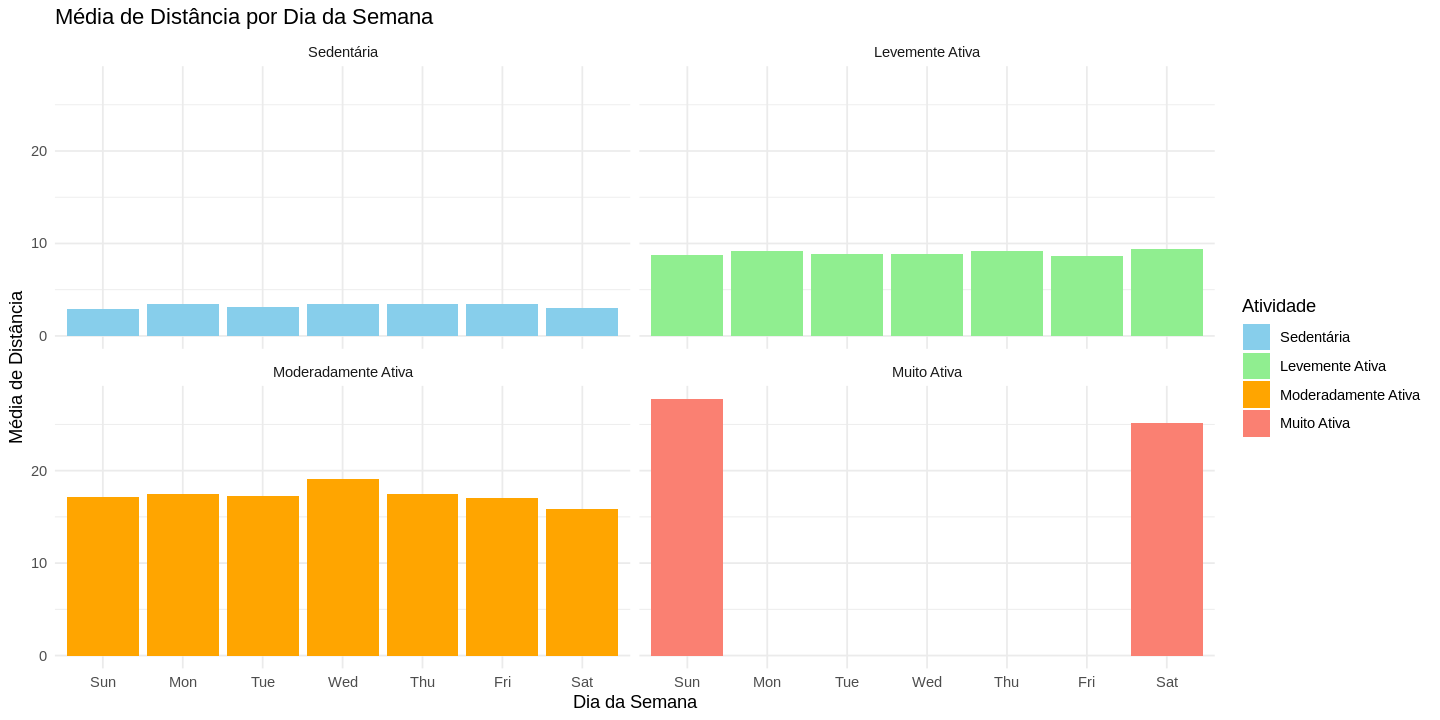

In [ ]:
# Extrai o dia da semana.
daily_activity$weekday <- wday(daily_activity$activity_date, label = TRUE)

# Calcula a média de level_active_distance por dia da semana.
mean_distance <- daily_activity %>%
  group_by(weekday, level_active_distance) %>%
  summarise(mean_distance = mean(total_distance))

# Cria o gráfico de barras facetado por level_active_distance.
ggplot(mean_distance, aes(x = weekday, y = mean_distance, fill = level_active_distance)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ level_active_distance) +
  labs(title = "Média de Distância por Dia da Semana",
       x = "Dia da Semana",
       y = "Média de Distância") +
  scale_fill_manual(values = c("Muito Ativa" = "salmon", "Moderadamente Ativa" = "orange", "Levemente Ativa" = "lightgreen", "Sedentária" = "skyblue")) +
  guides(fill = guide_legend(title = "Atividade")) +
  theme_minimal()



**Tempo gasto**  
Dando continuidade à análise por tipo de atividade com as variáveis de minutos de atividade (convertidas em horas para melhor entendimento), é possível observar que o tempo gasto de forma sedentária é bem elevado, com uma média de 16 horas. Ao avaliarmos a distribuição de frequência, os gráficos de distância e tempo de atividade se assemelham, com exceção apenas para a variável Sedentária, que tem um comportamento diferente e frequência agrupada por tipo de atividade é maior para Muita Ativas. Ao compararmos a distribuição de calorias queimadas por nível de atividade em relação ao tempo gasto, percebemos que as atividades Moderadamente Ativas têm queimas calóricas levemente superiores às atividades Muito Ativas, porém a correlação positiva mais forte é para a Levemente Ativa. Ao avaliar a média das distâncias por dia da semana, comparando os níveis de horas ativas percebemos que as atividades Moderadamente Ativa tem a média mais alta durante todos os dias da semana.

`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.


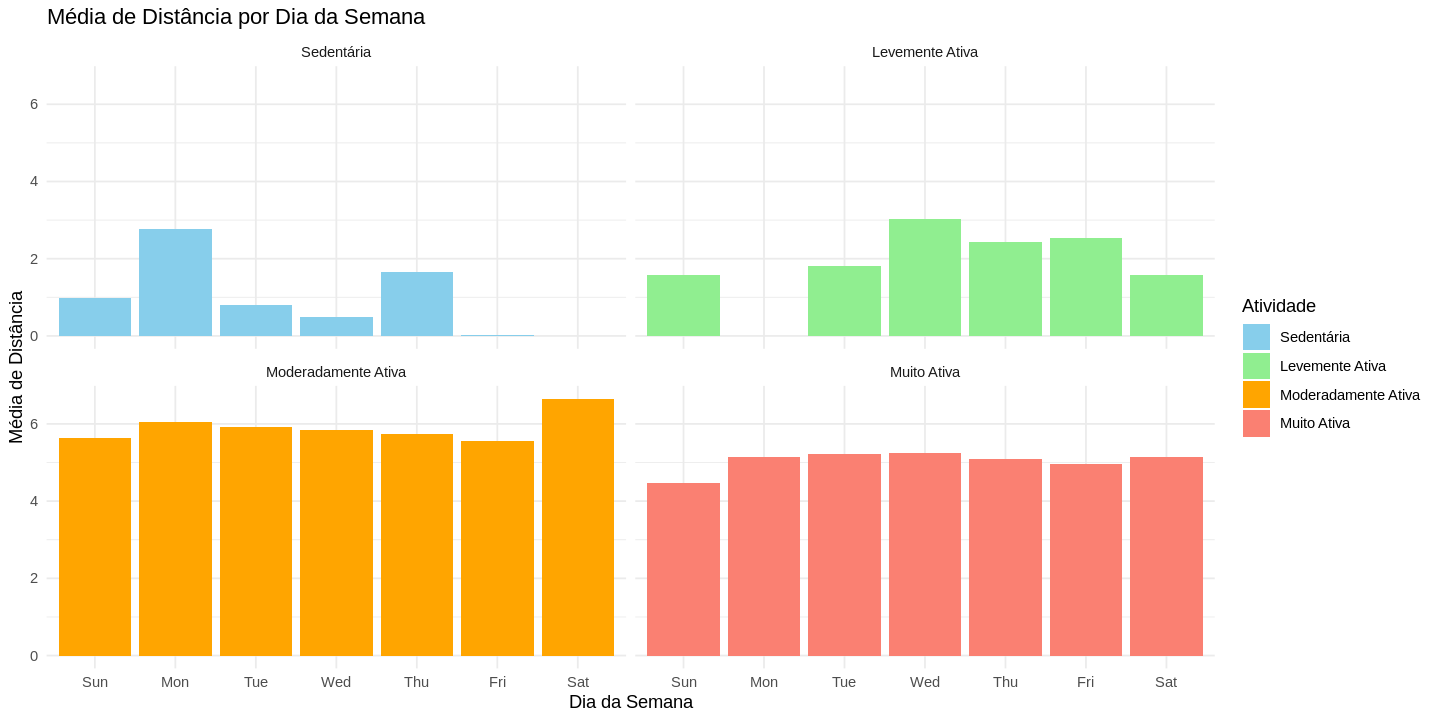

In [ ]:
# Extrai o dia da semana.
daily_activity$weekday <- wday(daily_activity$activity_date, label = TRUE)

# Calcula a média de level_active_hours por dia da semana
mean_distance <- daily_activity %>%
  group_by(weekday, level_active_hours) %>%
  summarise(mean_distance = mean(total_distance))

# Cria o gráfico de barras facetado por level_active_hours
ggplot(mean_distance, aes(x = weekday, y = mean_distance, fill = level_active_hours)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ level_active_hours) +
  labs(title = "Média de Distância por Dia da Semana",
       x = "Dia da Semana",
       y = "Média de Distância") +
  scale_fill_manual(values = c("Muito Ativa" = "salmon", "Moderadamente Ativa" = "orange", "Levemente Ativa" = "lightgreen", "Sedentária" = "skyblue")) +
  guides(fill = guide_legend(title = "Atividade")) +
  theme_minimal()

### **Frequência cardíaca**
Analisando o dataset com informações de frequência cardíaca dos 14 participantes, observamos que a média é de 79.76 e a mediana é de 77, sugerindo uma distribuição relativamente simétrica. Ao analisarmos o histograma da variável, confirmamos a distribuição quase simétrica dos dados.
No entanto, ao avaliarmos o boxplot, notamos a presença de muitos outliers, que apesar de não afetarem significativamente a média, são situações específicas que precisam ser consideradas. No geral, observa-se que os batimentos cardíacos variam entre 50 e 100, e avaliando a média ao longo do tempo, observamos um aumento, que sugere uma relação com aumento da frequência de atividades físicas, no entanto é importante considerar esses resultados com cautela, possíveis influências externas.

Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


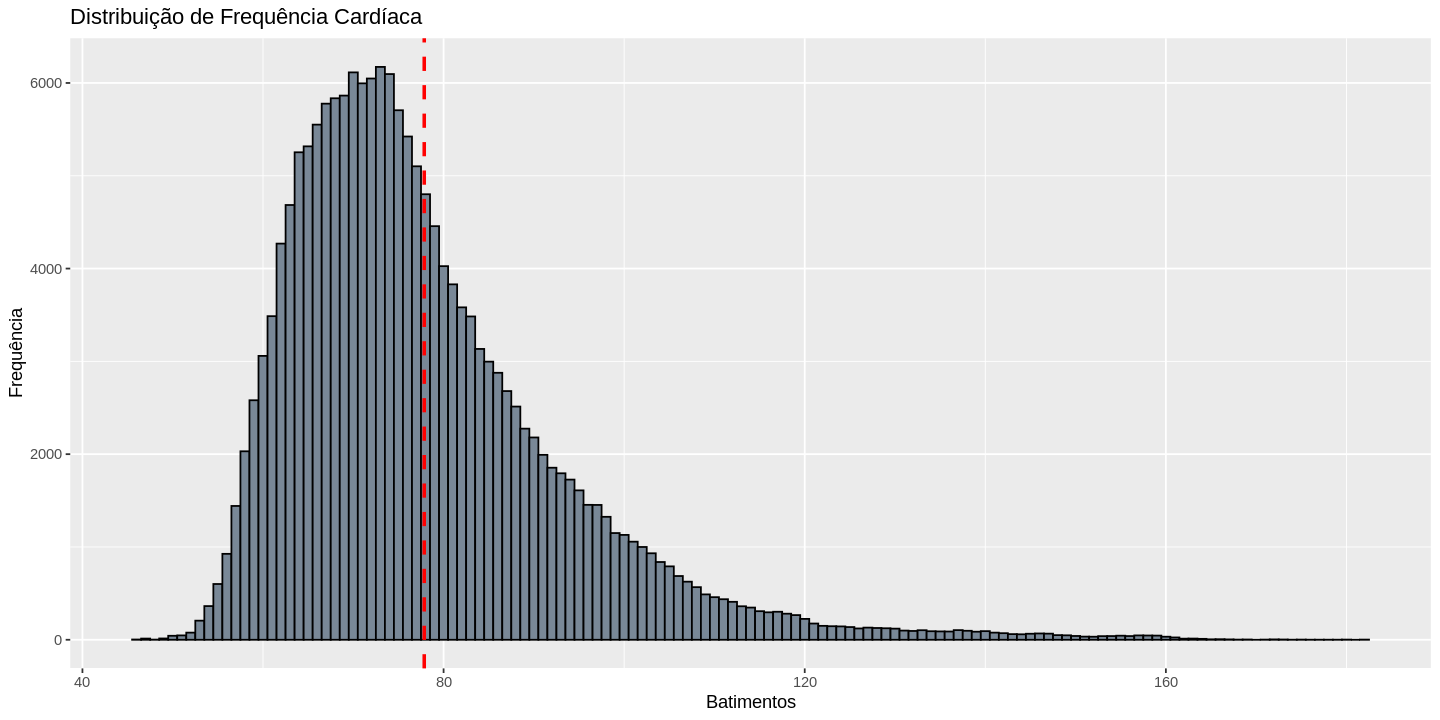

In [ ]:
# Calcular a média dos batimentos cardíacos.
mean_hr <- mean(heartrate_seconds$value, na.rm = TRUE)

# Criar um histograma para a variável de frequência cardíaca.
ggplot(heartrate_seconds, aes(x = value)) +
  geom_histogram(binwidth = 1, fill = "#798897", color = "black") +
  geom_vline(xintercept = mean_hr, color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribuição de Frequência Cardíaca", x = "Batimentos", y = "Frequência")

### **Peso**
Analisando o dataset com informações de peso, vemos que o peso médio dos 13 participantes é de 72.47 kg e a mediana 62.50 kg. Essa diferença pode ser explicada pelos outliers com valores elevados. Ao avaliarmos a variável de índice de massa corpórea (bmi) com média igual a 25.37 e mediana 24.39 percebemos que não há tanta diferença entre as duas medidas. A média para a gordura (fat) é 19.75, mas vale lembrar que dos 98 registros únicos do dataset, apenas 6 registros foram preenchidos para essa variável. Outro ponto a se levar em consideração é o fato de 64% dos registros serem feitos de forma manual, que podem conter erros de digitação.   
<br>





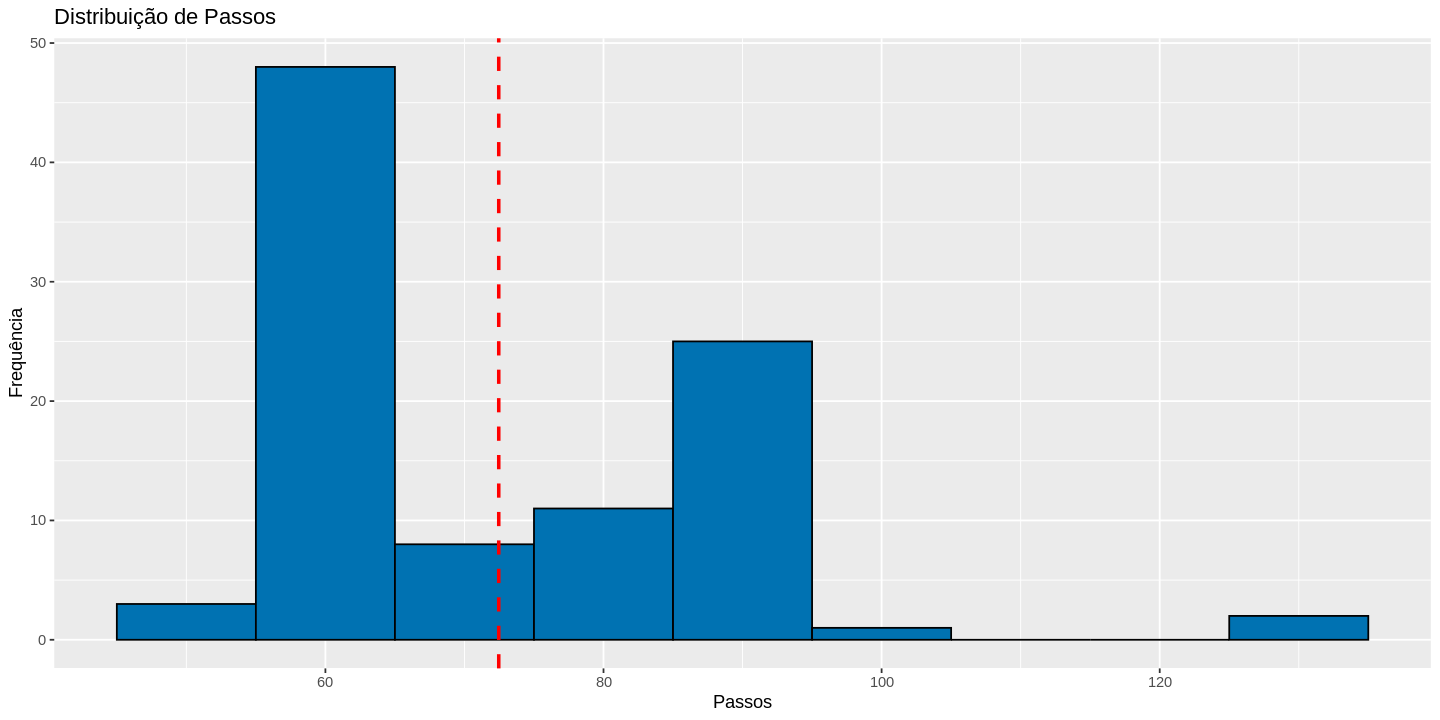

In [ ]:
# Calcular a média de peso.
mean_weight_kg <- mean(weight_info$weight_kg, na.rm = TRUE)

# Cria um histograma para a variável de passos.
ggplot(weight_info, aes(x = weight_kg)) +
  geom_histogram(binwidth = 10, fill = "#0072B2", color = "black") +
  geom_vline(xintercept = mean_weight_kg, color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribuição de Passos", x = "Passos", y = "Frequência")

### **Sono**
Analisando o dataset com informações de sono que também foram convertidas em horas para melhor entendimento, vemos que a média de horas dormindo (total_hours_asleep) dos 24 participantes é de aproximadamente 7 horas e o tempo médio na cama (total_hours_in_bed) é um pouco mais de 7,5 horas. Ao comparar as duas variáveis no boxplot confirmamos a distribuição semelhante e o gráfico de dispersão nos mostra uma correlação positiva entre as duas variáveis. Ao avaliar a distribuição das horas dormindo é possível perceber que os valores mais frequentes se concentram entre 5h e 10h. Avaliando a média de horas dormindo por dia da semana percebe uma constância dentro da média geral para todos os dias. Ao verificar a variável de registro (total_sleep_records) podemos perceber que a maioria dos participantes 88% possuem 1 registro de sono, 10% possui 2 registros e menos de 1% possui 3 registros.

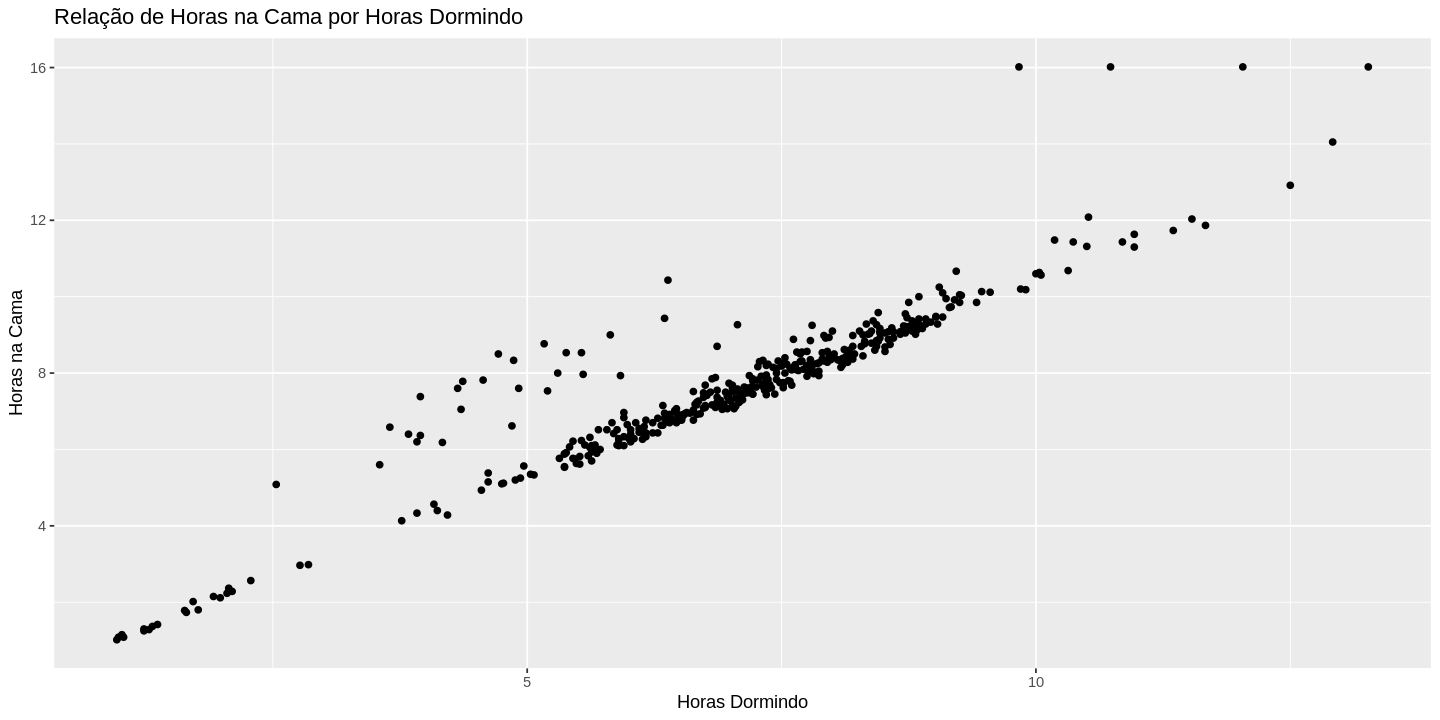

In [ ]:
# Cria um gráfico de dispersão para as variáveis horas dormindo e horas na cama.
ggplot(data = sleep_day, aes(x = total_hours_asleep, y = total_hours_in_bed)) +
  geom_point() +
  labs(title = "Relação de Horas na Cama por Horas Dormindo", x = "Horas Dormindo", y = "Horas na Cama")

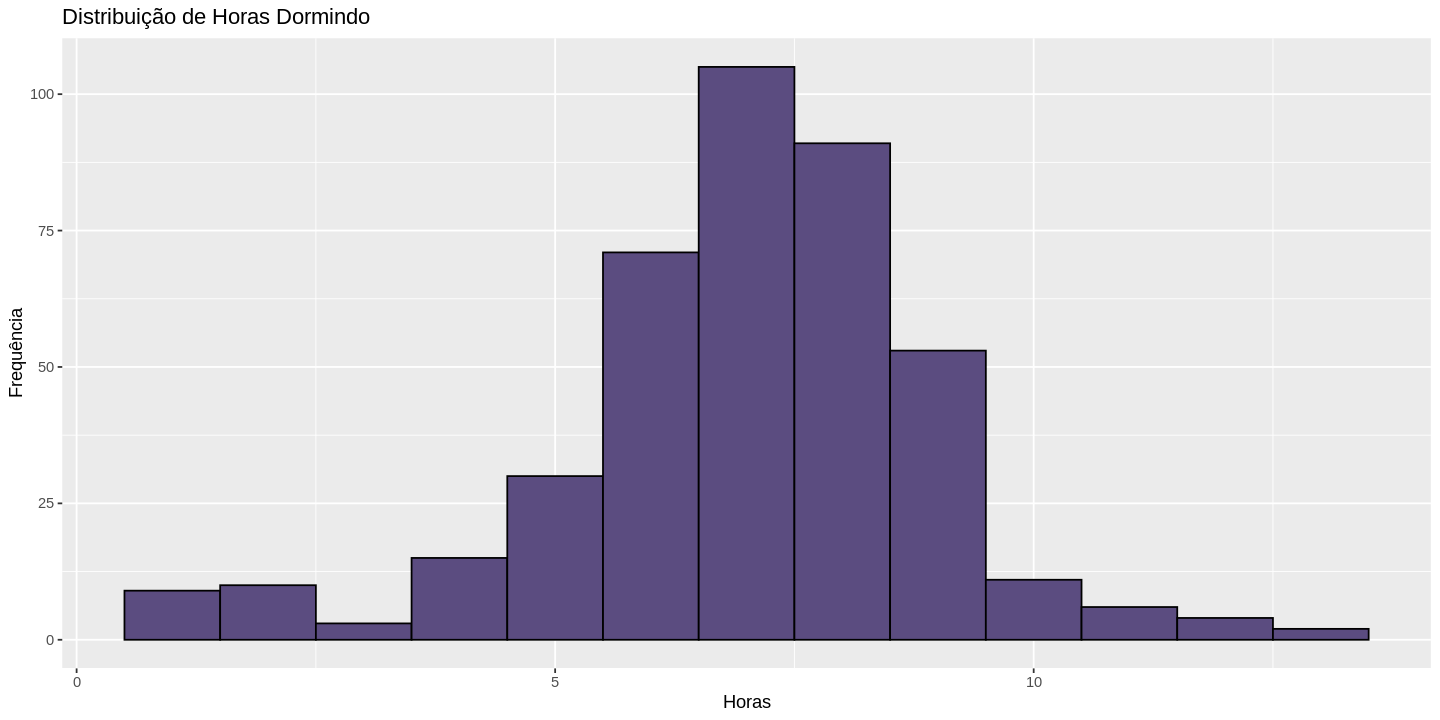

In [ ]:
# Cria um histograma para a variável de horas dormindo.
ggplot(sleep_day, aes(x = total_hours_asleep)) +
  geom_histogram(binwidth = 1, fill = "#5B4C80", color = "black") +
  labs(title = "Distribuição de Horas Dormindo", x = "Horas", y = "Frequência")

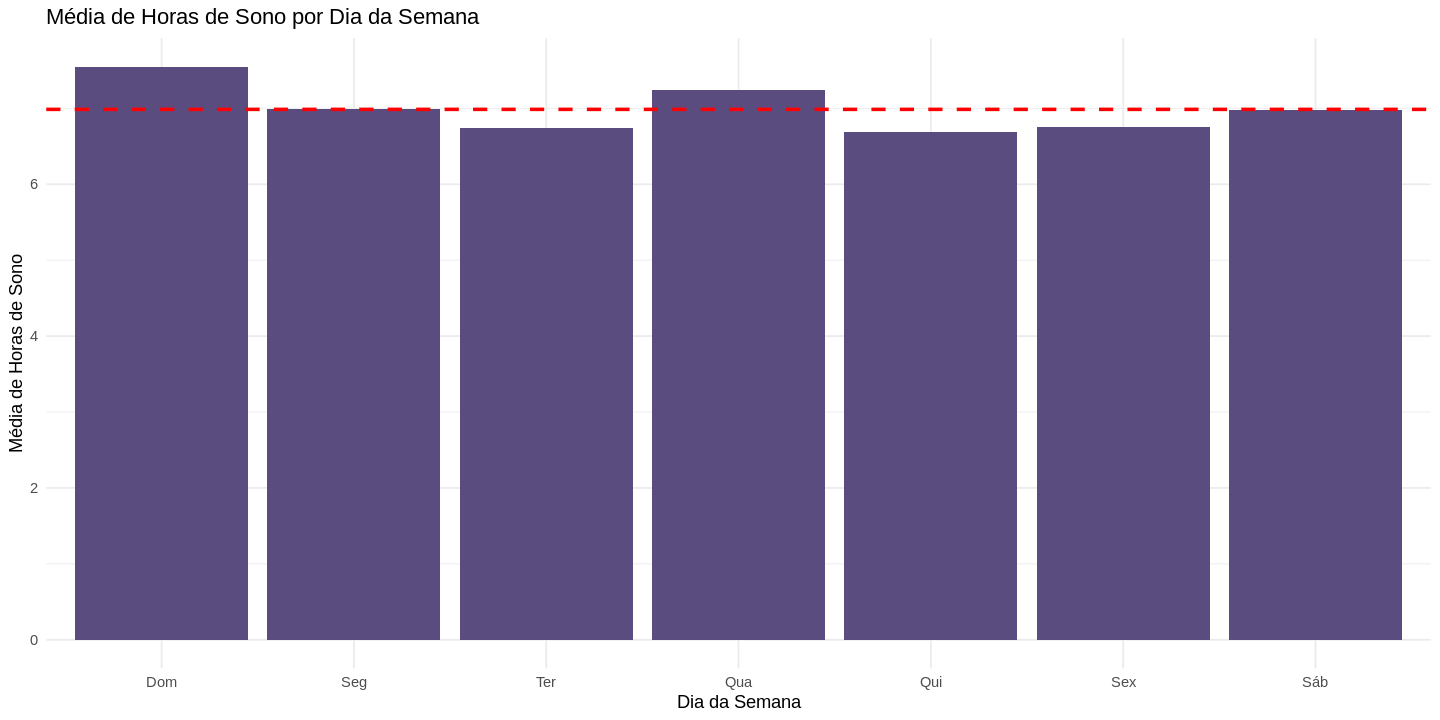

In [ ]:
# Calcular a média dos batimentos cardíacos.
mean_sleep <- mean(sleep_day$total_hours_asleep, na.rm = TRUE)

# Extrai o dia da semana.
sleep_day$weekday <- wday(sleep_day$sleep_day_data, label = TRUE)

# Agrupa os dados por dia da semana e calcula a média das horas de sono.
avg_weekday_sleep <- sleep_day %>%
  group_by(weekday) %>%
  summarise(avg_hours_asleep = mean(total_hours_asleep))

# Cria o gráfico de barras com a média das horas de sono ao longo da semana.
ggplot(avg_weekday_sleep, aes(x = weekday, y = avg_hours_asleep)) +
  geom_bar(stat = "identity", fill = "#5B4C80") +
  geom_hline(yintercept = mean_sleep, color = "red", linetype = "dashed", size = 1) +
  labs(title = "Média de Horas de Sono por Dia da Semana",
       x = "Dia da Semana",
       y = "Média de Horas de Sono") +
  scale_x_discrete(labels = c("Dom", "Seg", "Ter", "Qua", "Qui", "Sex", "Sáb")) +
  theme_minimal()

# AGIR

## Respondendo o problema de negócios

**Quais são algumas das tendências no uso de dispositivos inteligentes?**  
Inicialmente conseguimos perceber que o uso de dispositivos servem como um incentivo para os participantes, já que houve um aumento no número de passos, distâncias percorridas e aumento da frequência cardíaca, o que sugere uma rotina mais ativa.

**Como essas tendências podem se aplicar aos clientes da Bellabeat?**  
Os dados desta análise podem ser usados para formulação de indicadores iniciais para estimular os usuários a se manterem ativos e melhorarem a sua performance.

**Como essas tendências podem ajudar a influenciar a estratégia de marketing da Bellabeat?**  
O entendimento do comportamento do usuário ajuda a entender os melhores momentos para se comunicar com usuário e assim engajar de forma mais eficiente.


## Recomendações

Produto Leaf: rastreador de bem-estar clássico da Bellabeat pode ser usado como pulseira, colar ou clipe. O rastreador Leaf se conecta ao aplicativo Bellabeat para rastrear a atividade, o sono e o estresse.  

* E-mail marketing ou SMS ou outro canal de comunicação com frequência personalizada, de acordo com o nível de atividades (Sedentária, Levemente Ativa, Moderadamente Ativa e Muito Ativa) para acompanhar o progresso das atividades no aplicativo Bellabeat para incentivar uma vida mais ativa e estimular o uso do aplicativo.
* Uso de alertas/notificações (vibração) nos dispositivos avisando que usuário está mais 3h sedentárias, com opção de personalizar ou desativar o alerta.
* Adicionar informações que queima calorias que podem ser mais um incentivador para uso do dispositivo e manter os usuários mais engajados em uma vida mais ativa.
* Os dados também podem ser usados como indicadores com objetivo de converter os usuários para progredirem nos níveis (Sedentária, Levemente Ativa, Moderadamente Ativa e Muito Ativa), isso pode ser feito de forma gamificada, levando em consideração que normalmente pessoas que praticam atividade física gostarem de se desafiar.

